In [ ]:
Q-2. Imagine you have a dataset where you have different features like Age ,

Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes.
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
!pip install ploty


In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data prepocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Tuning parameter
from sklearn.model_selection import GridSearchCV

# Model
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

# result
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score


#retina
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\admin-1\AppData\Local\Temp\ipykernel_8260\1509847769.py:37: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
# rename the lebel columns from 'NObeyesdad' to 'result'
df = df.rename(columns={'NObeyesdad': 'result'})
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,result
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
print('Dataset consisting of ',df.shape[0],' observations')
print('Dataset consisting of ',df.shape[1],' columns')

Dataset consisting of  2111  observations
Dataset consisting of  17  columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
result                            0
dtype: int64

In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
##EDA

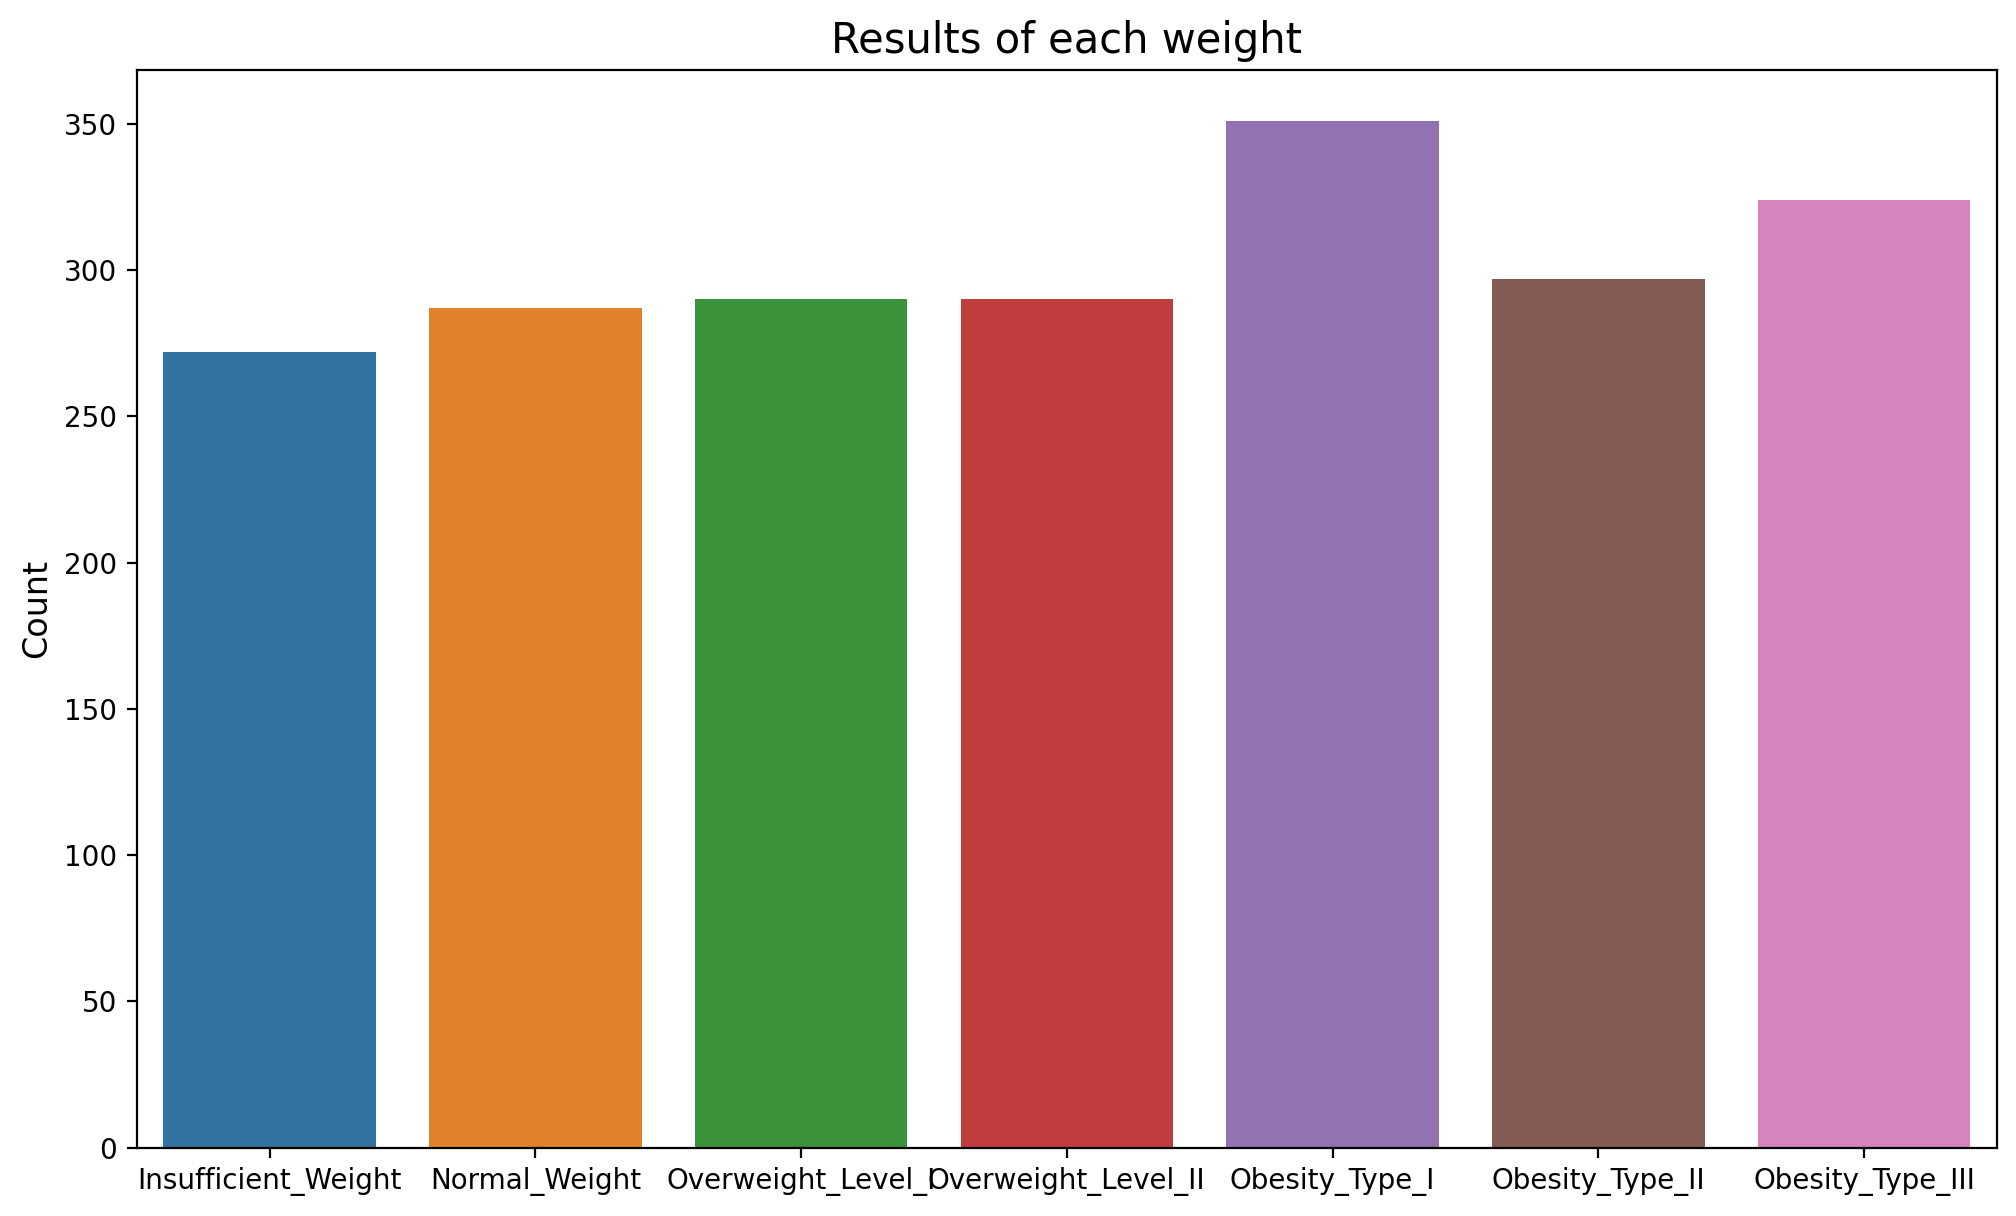

In [8]:
name = df['result'].value_counts().index
num = df['result'].value_counts().values


plt.figure(figsize=(12,7))
sns.countplot(x='result',data=df,order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Results of each weight',fontsize=15)
plt.show()

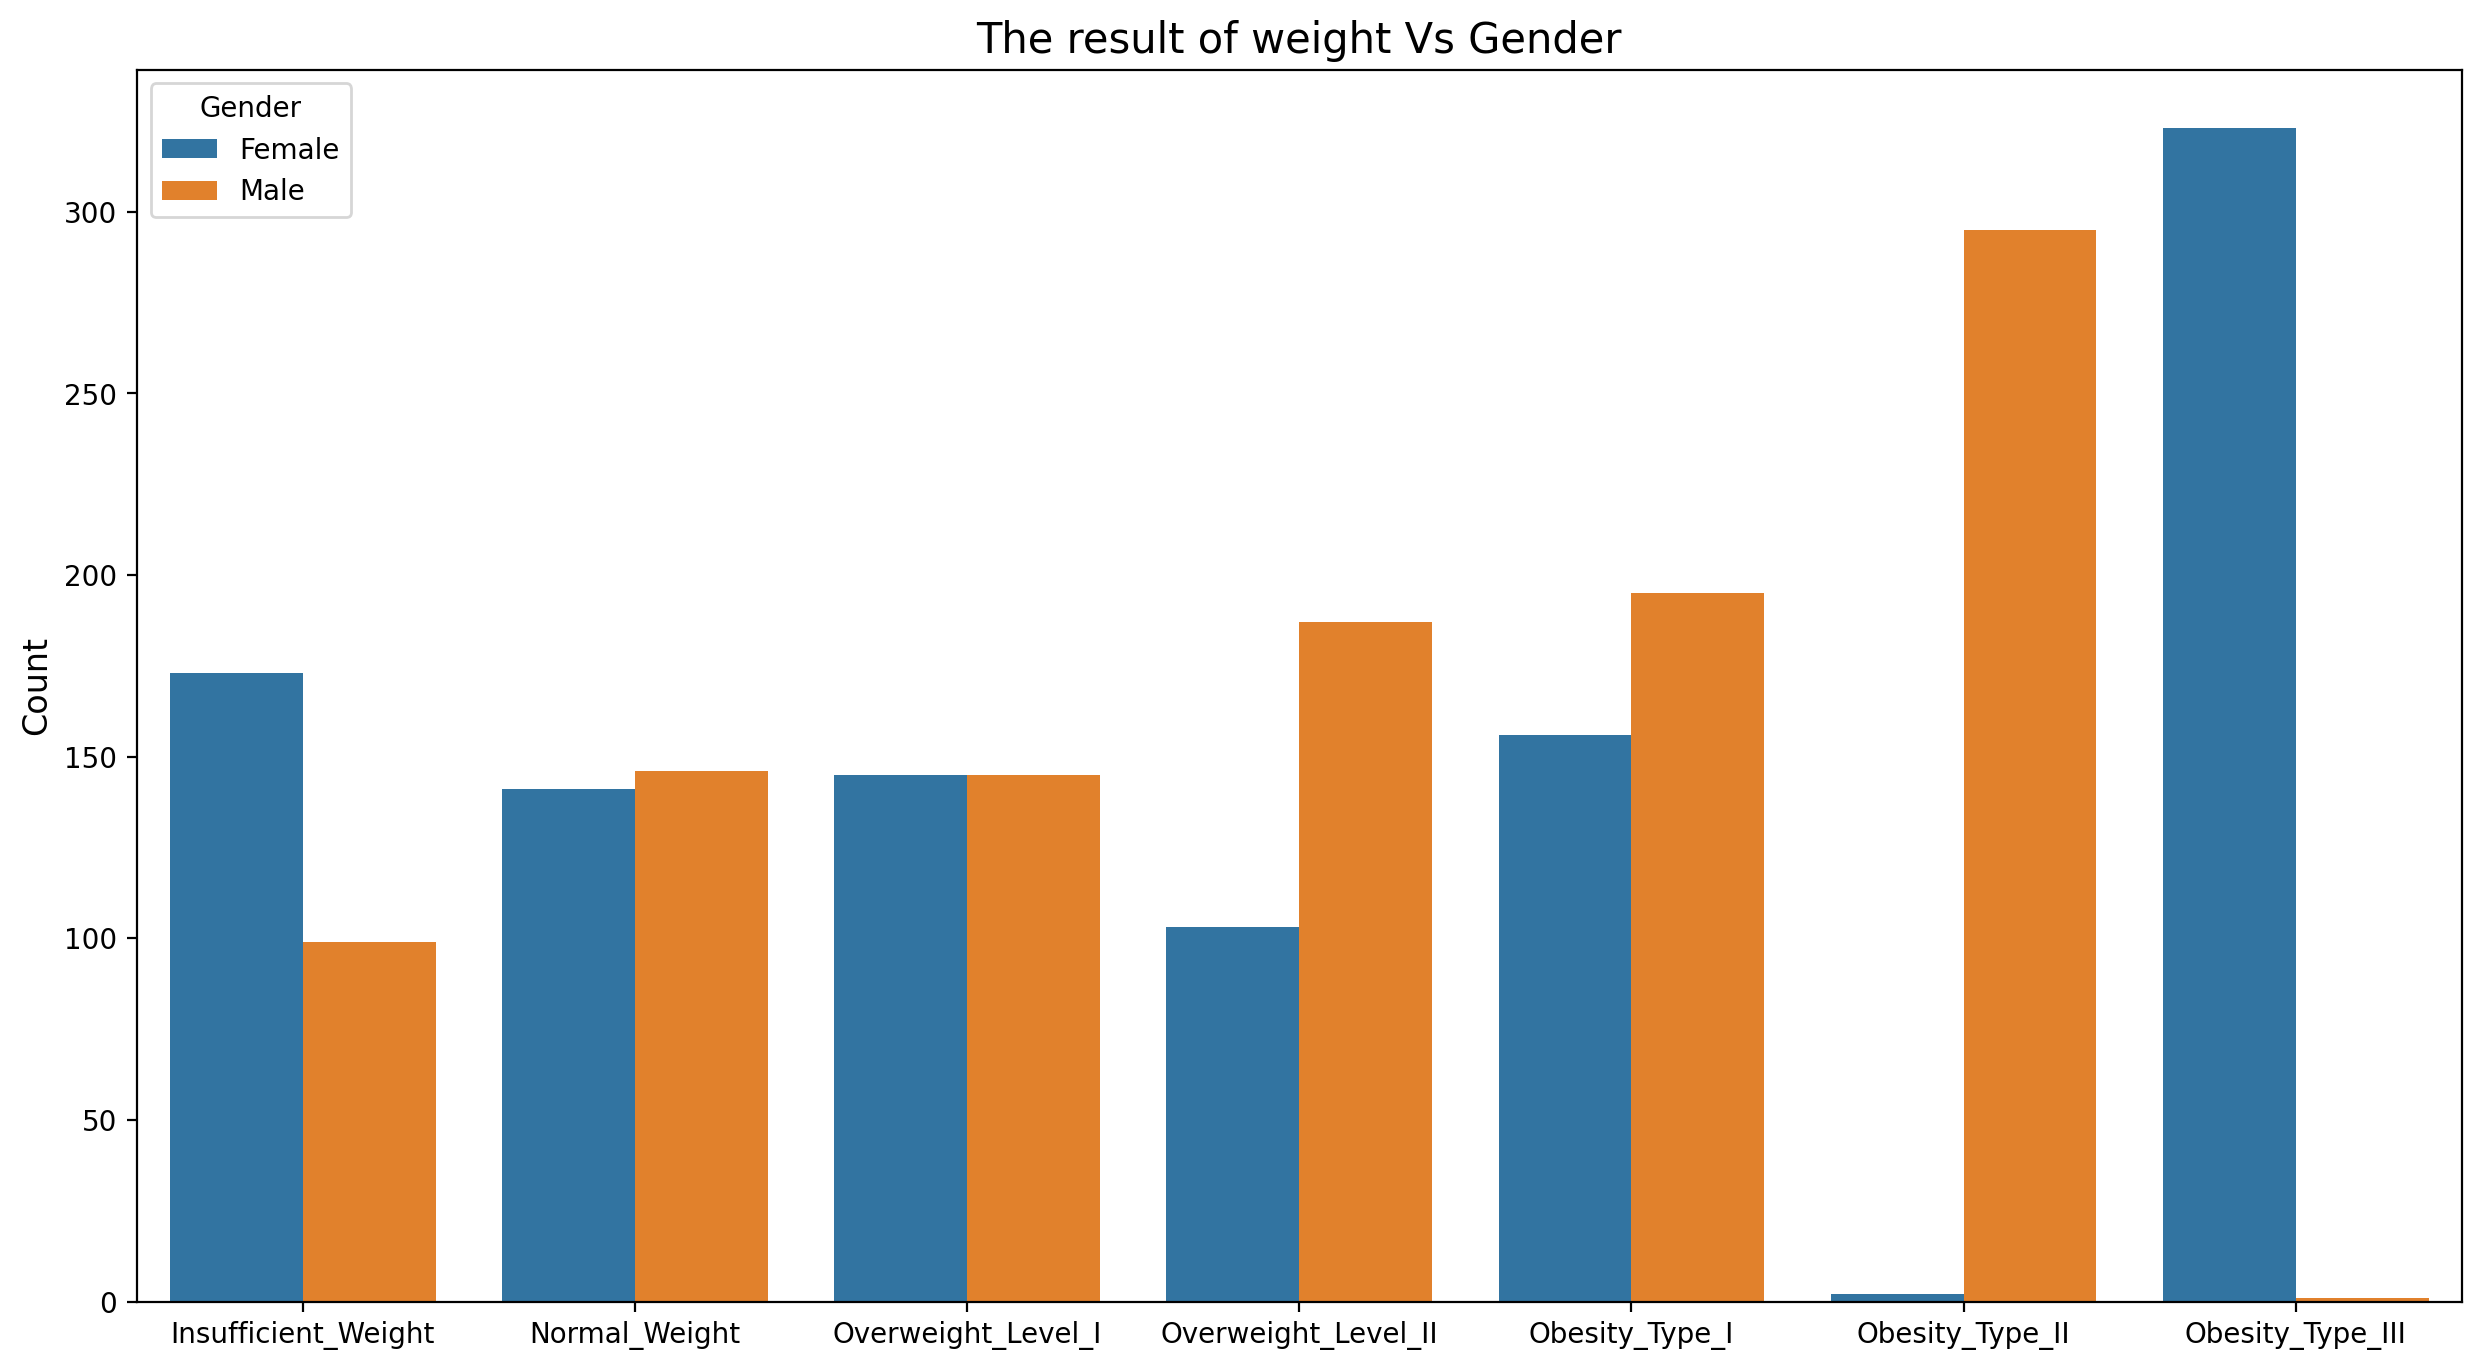

In [9]:
plt.figure(figsize=(15,8))
sns.countplot(x='result',data=df,hue='Gender',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.ylabel('Count',fontsize=12)
plt.xlabel(None)
plt.title('The result of weight Vs Gender',fontsize=15)
plt.show()

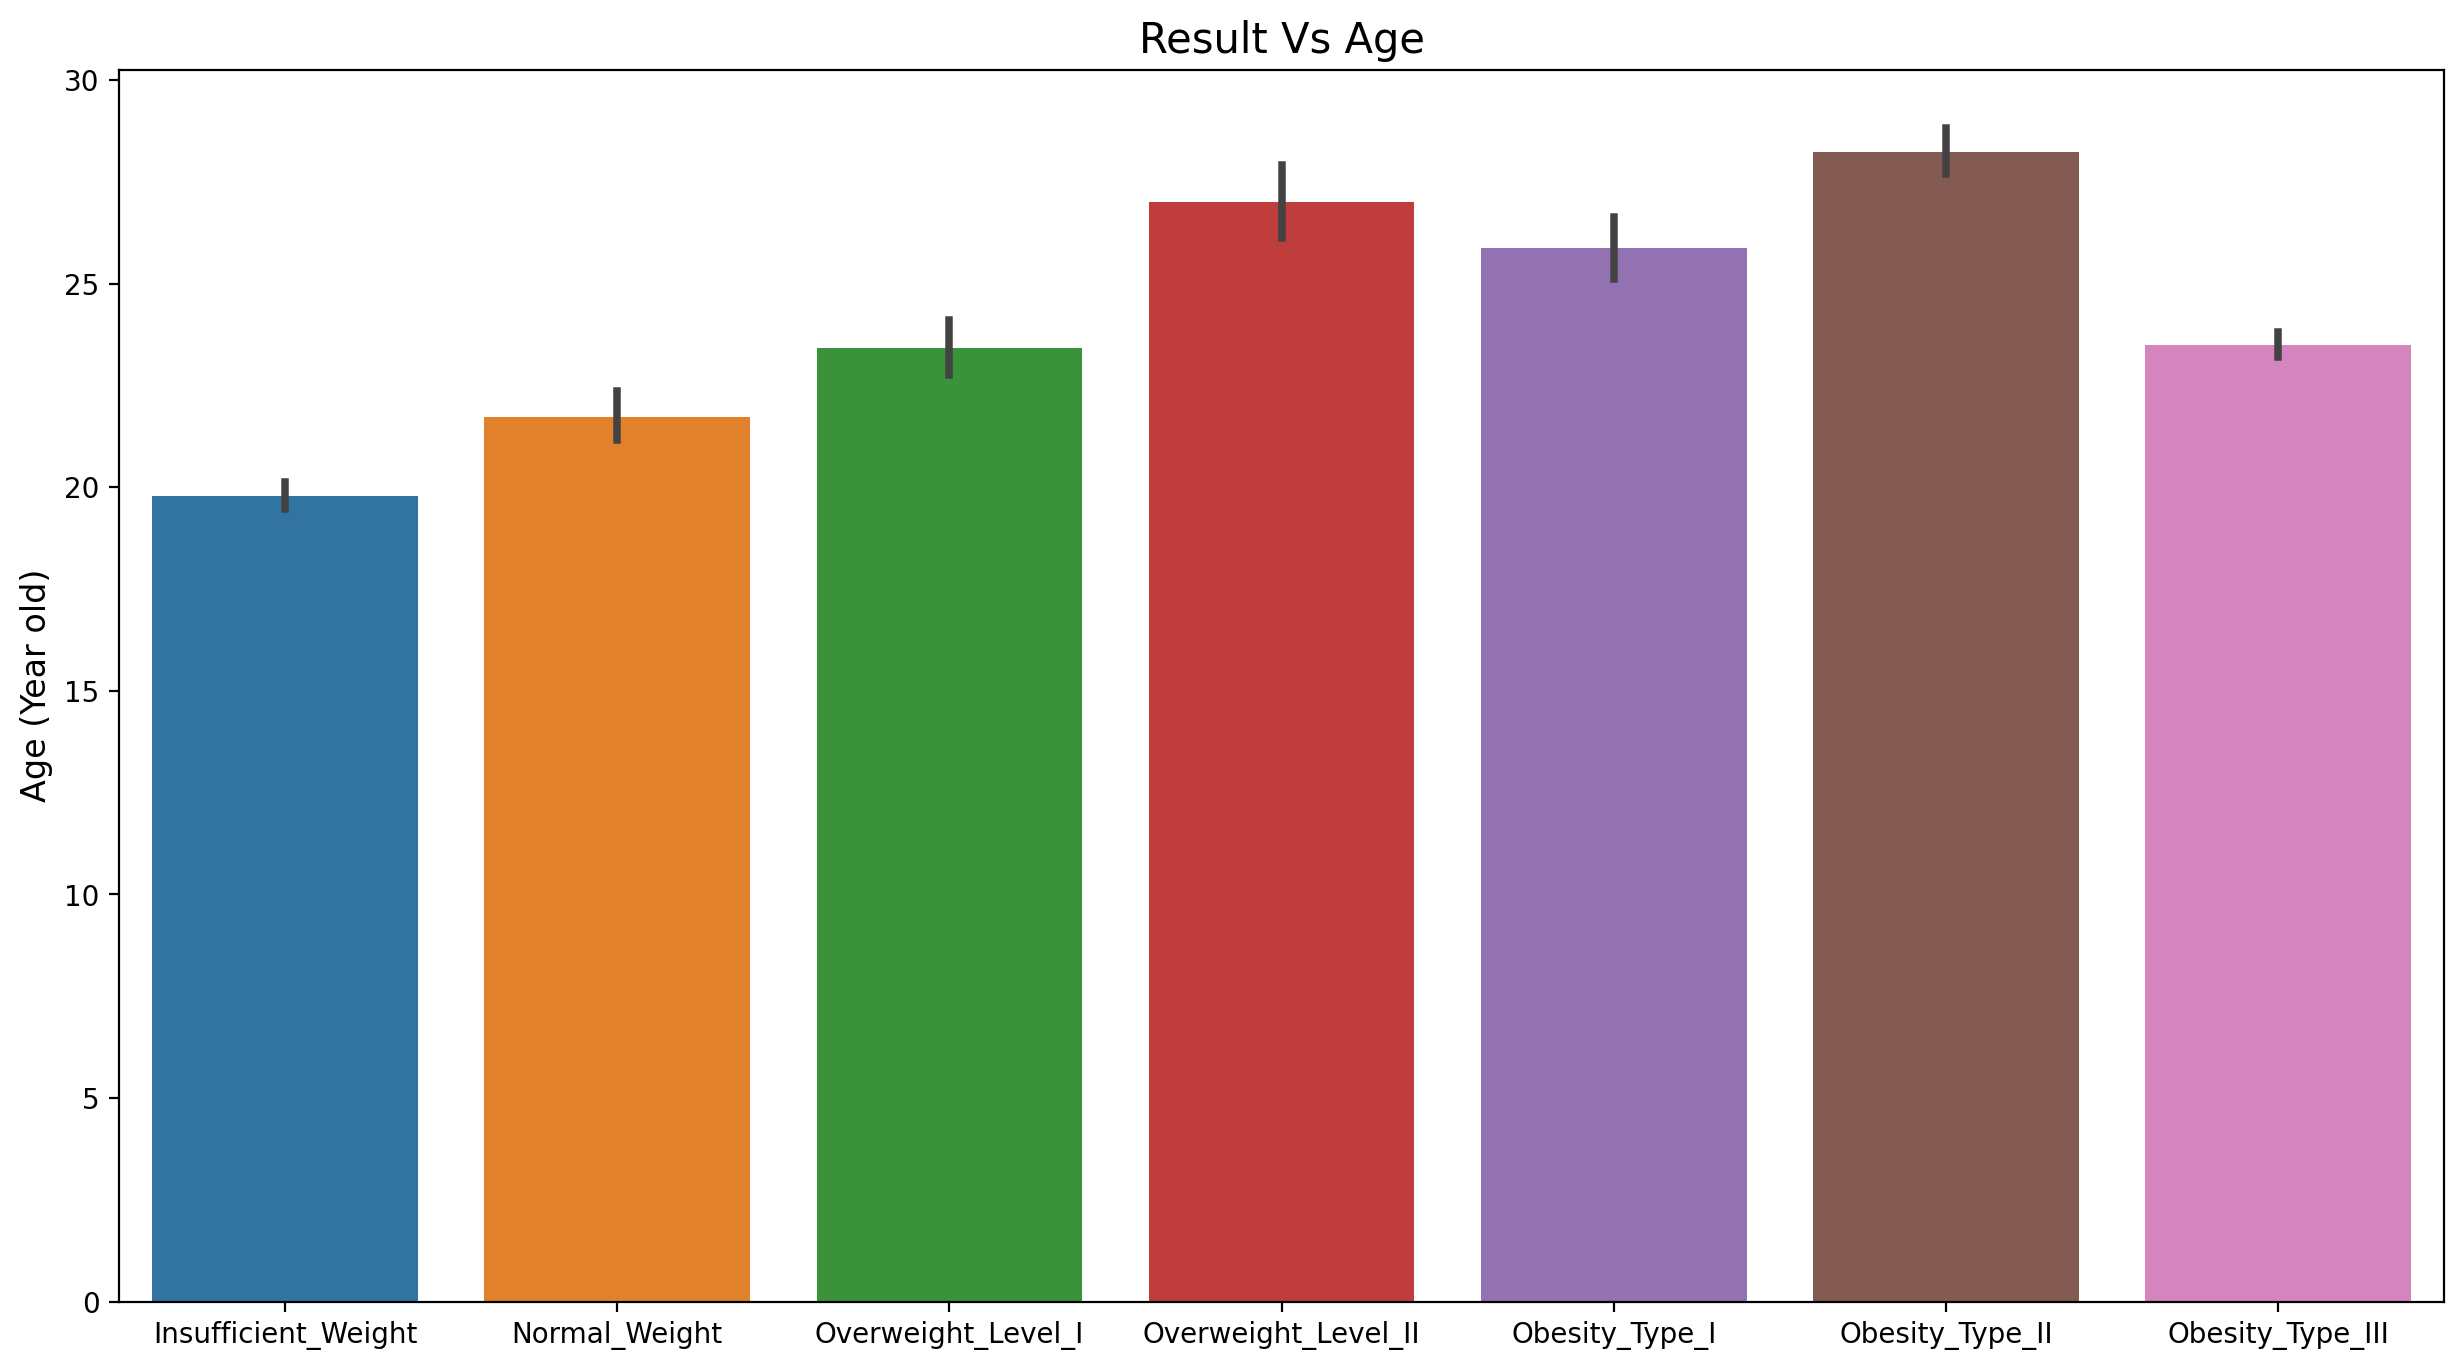

In [10]:
plt.figure(figsize=(15,8))
sns.barplot(x='result',y='Age',data=df,order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('Result Vs Age',fontsize=15)
plt.ylabel('Age (Year old)',fontsize=12)
plt.xlabel(None)
plt.show()

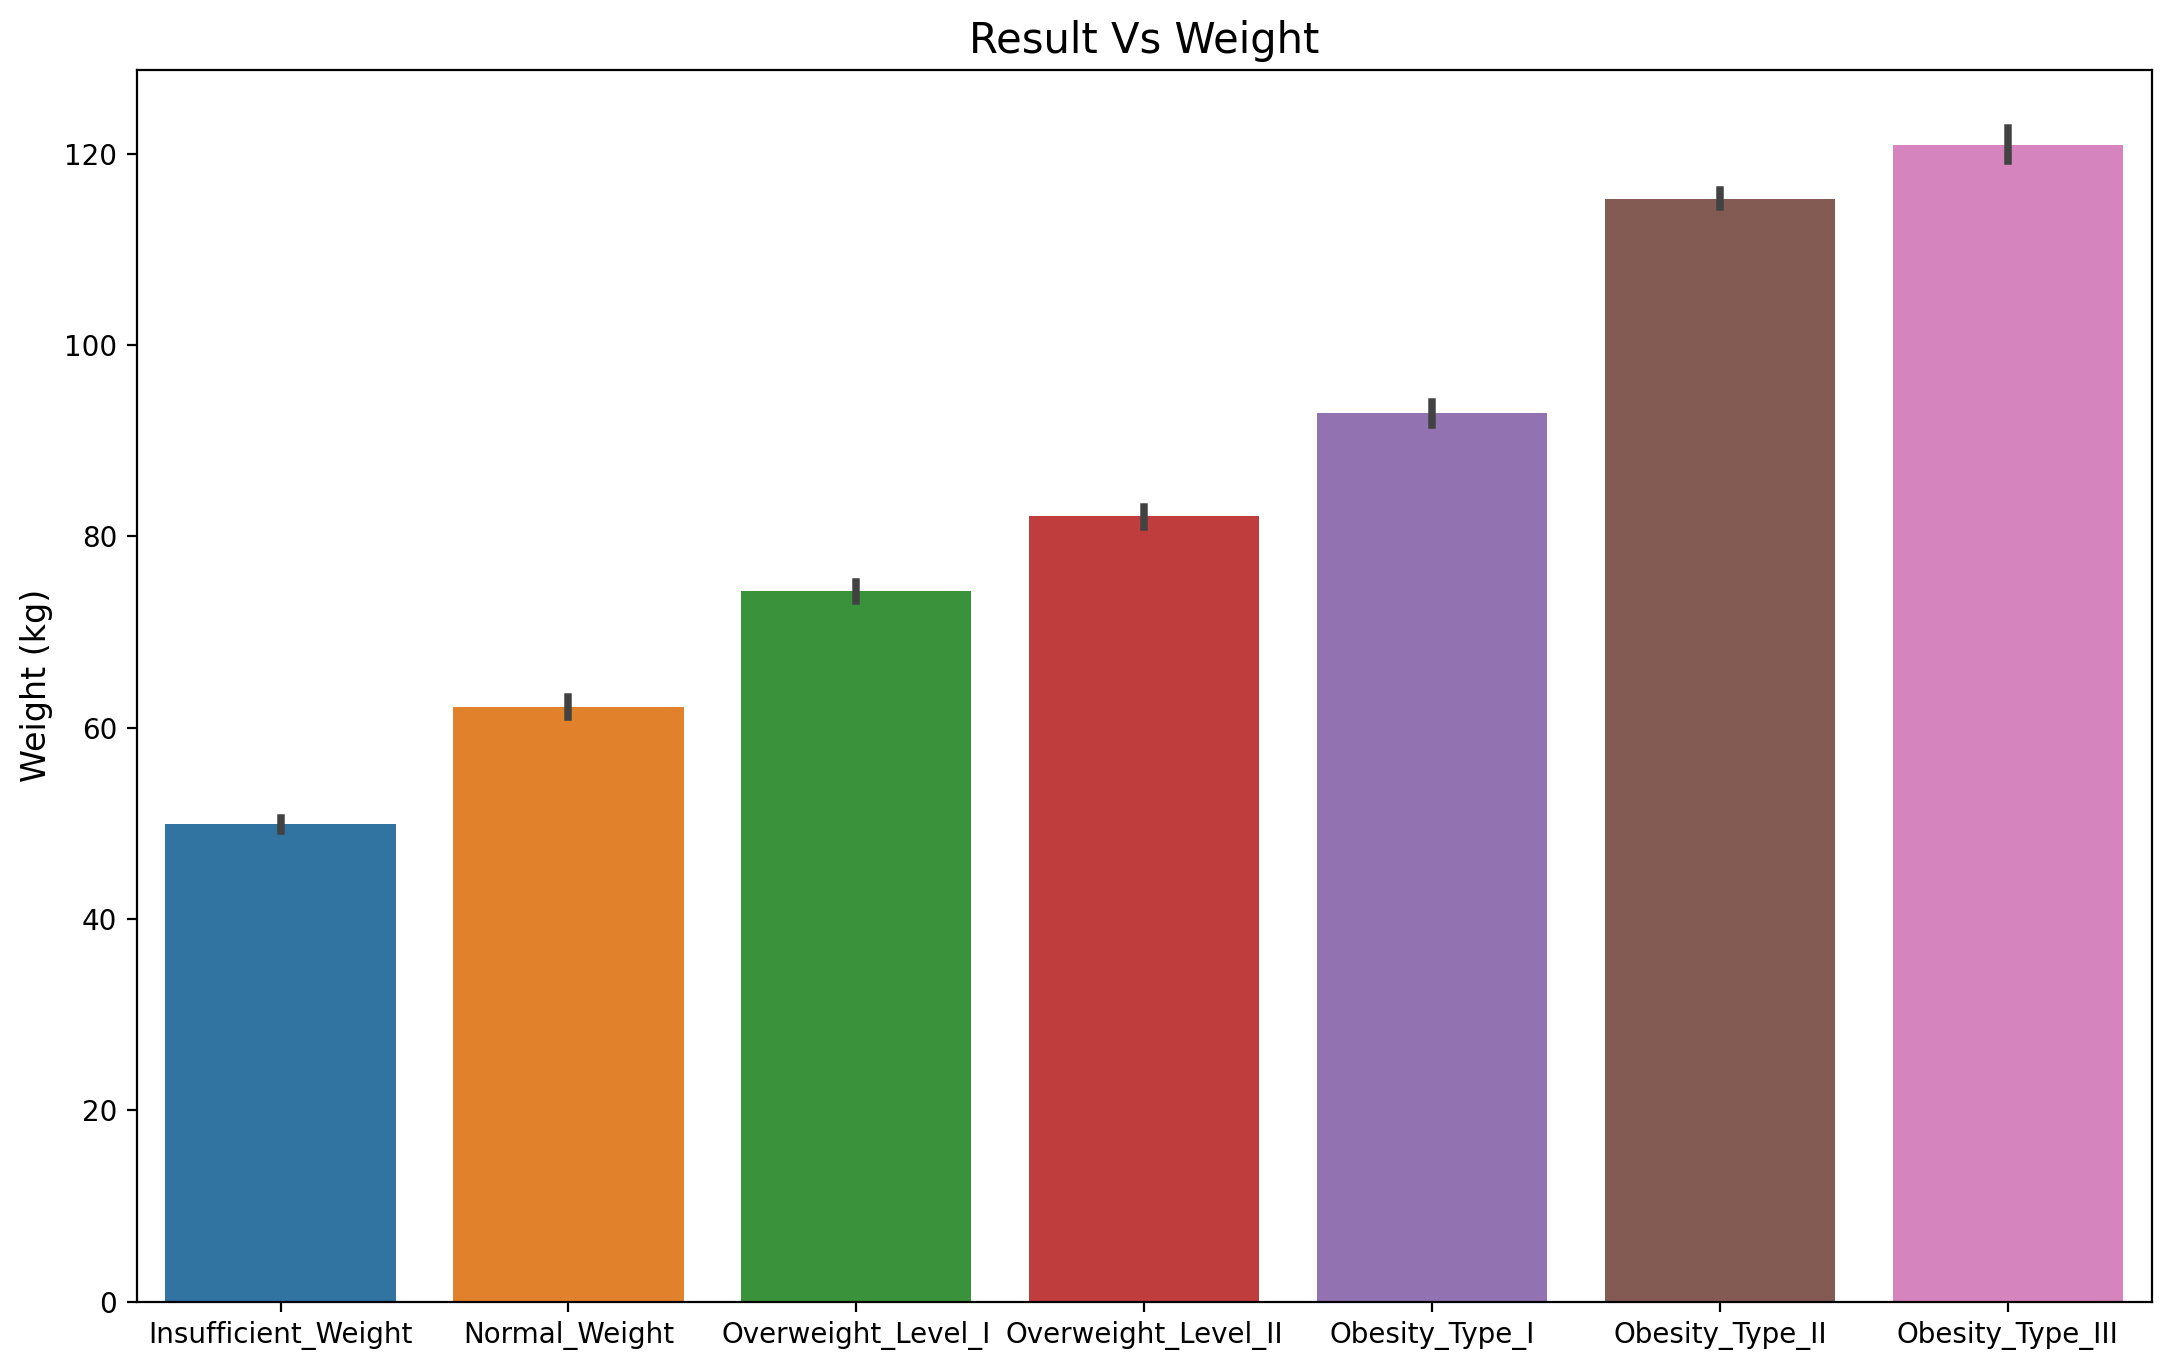

In [11]:
plt.figure(figsize=(13,8))
sns.barplot(x='result',y='Weight',data=df,
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Weight (kg)',fontsize=12)
plt.title('Result Vs Weight',fontsize=15)
plt.show()

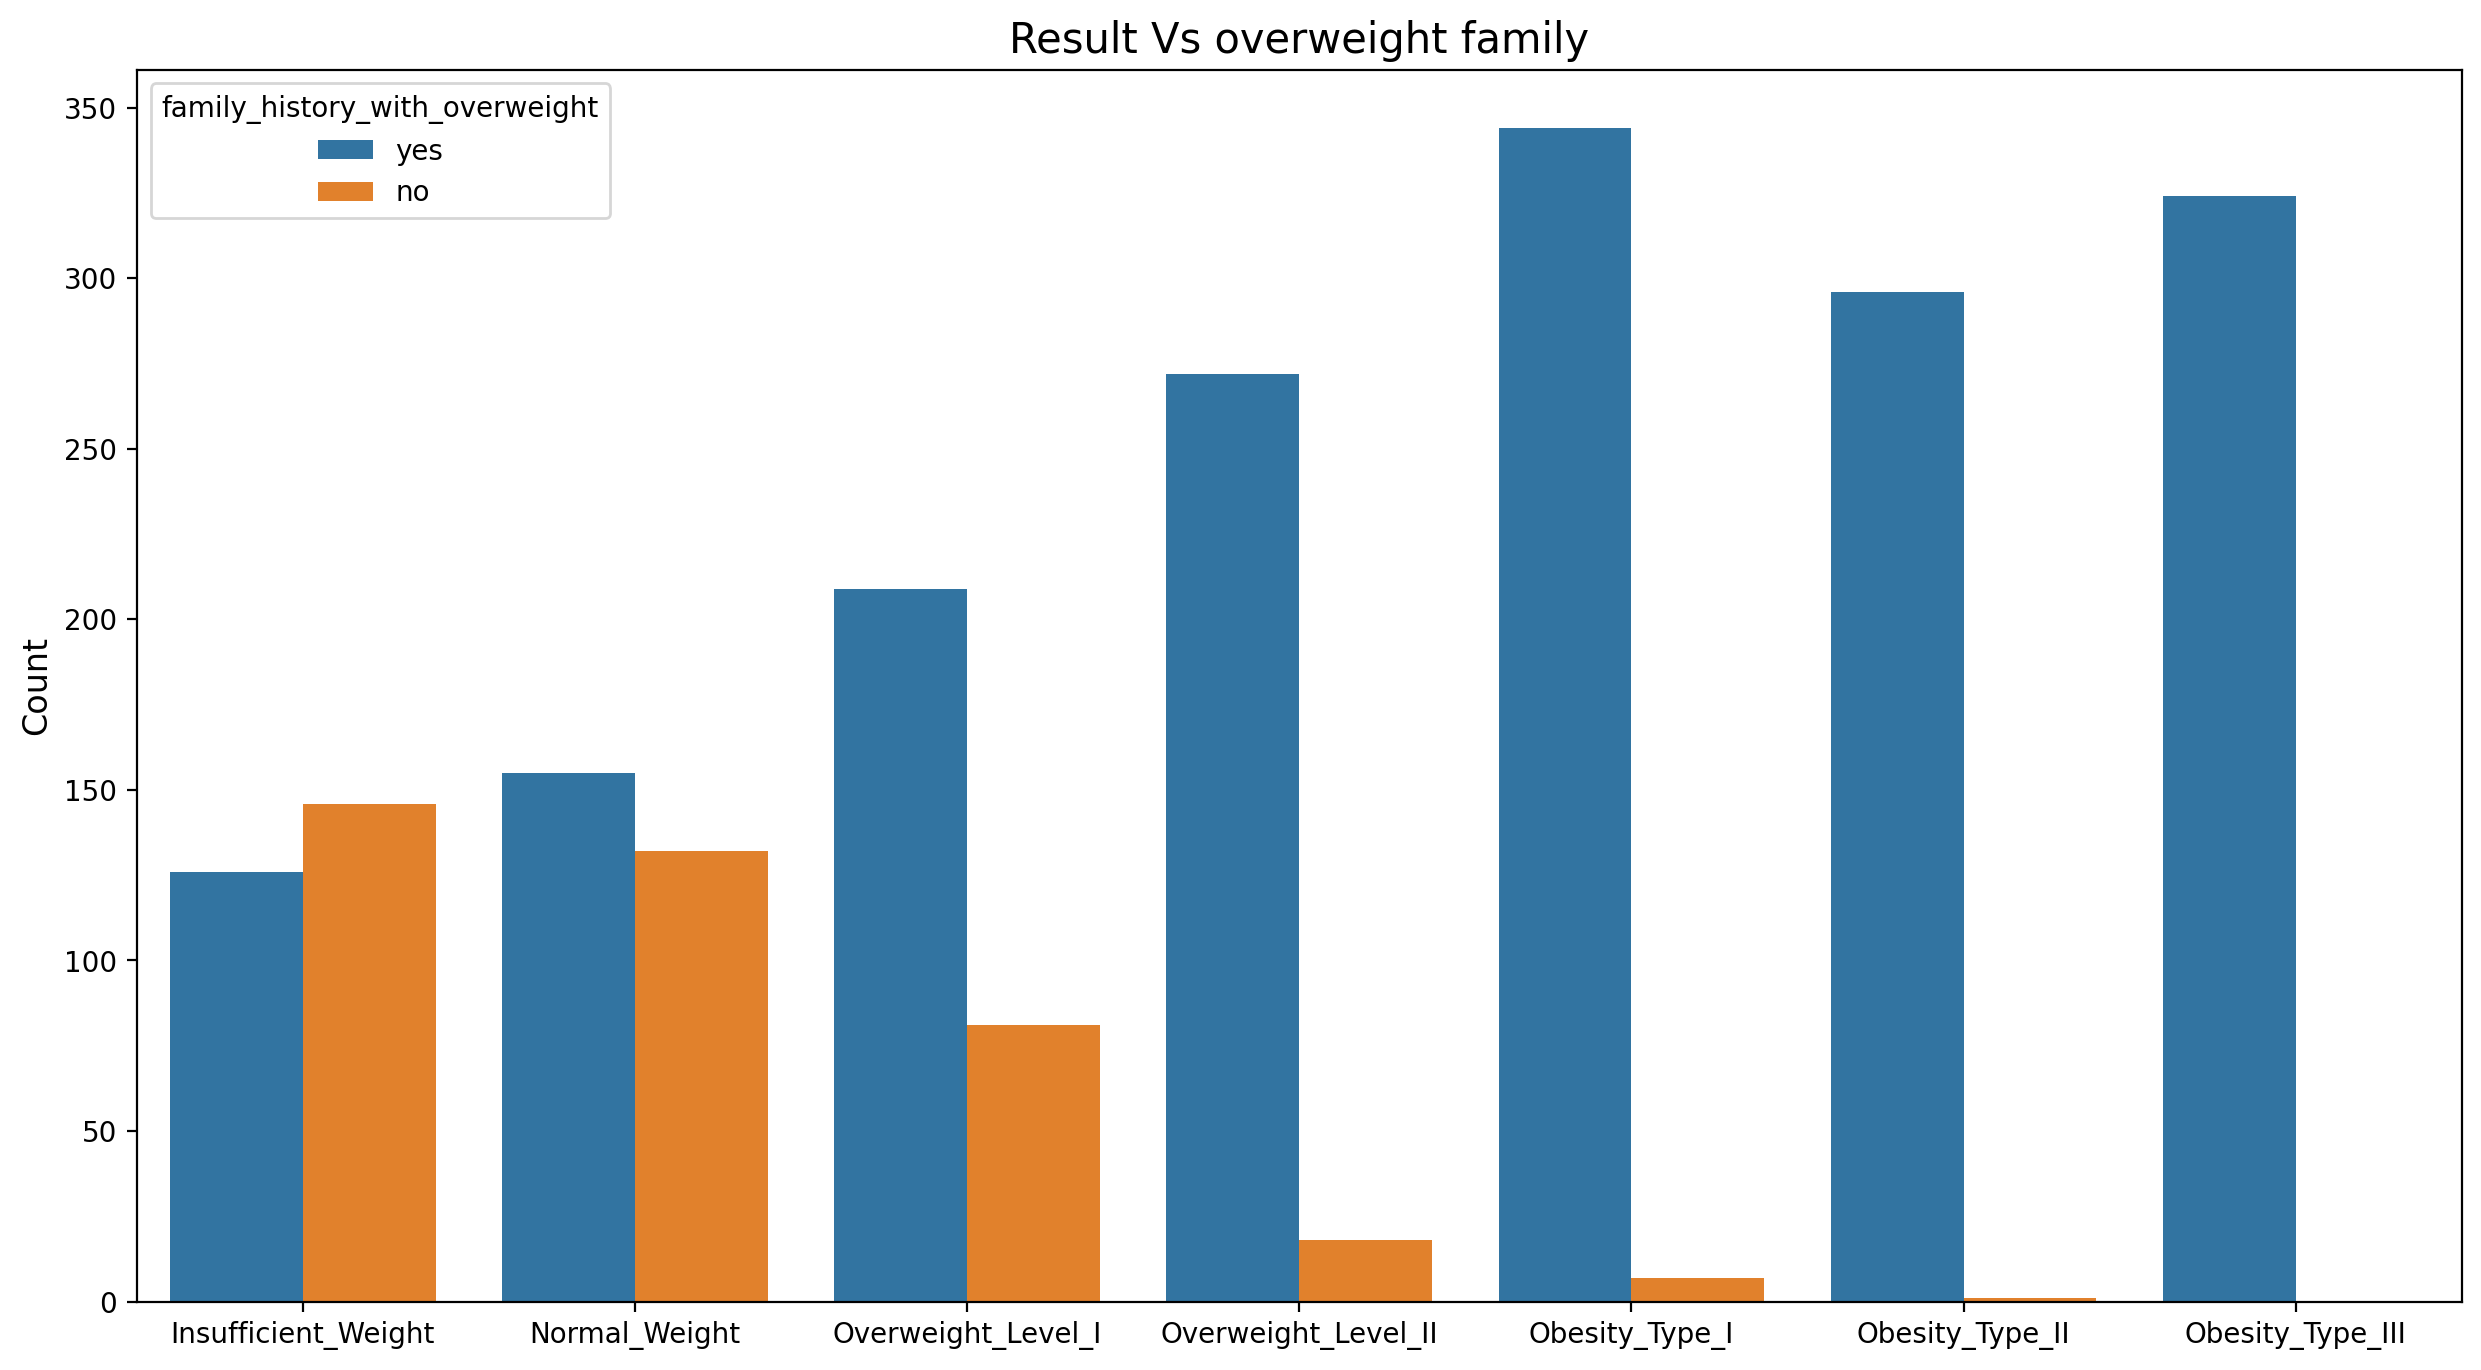

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(x='result',data=df,hue='family_history_with_overweight',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs overweight family',fontsize=15)
plt.show()

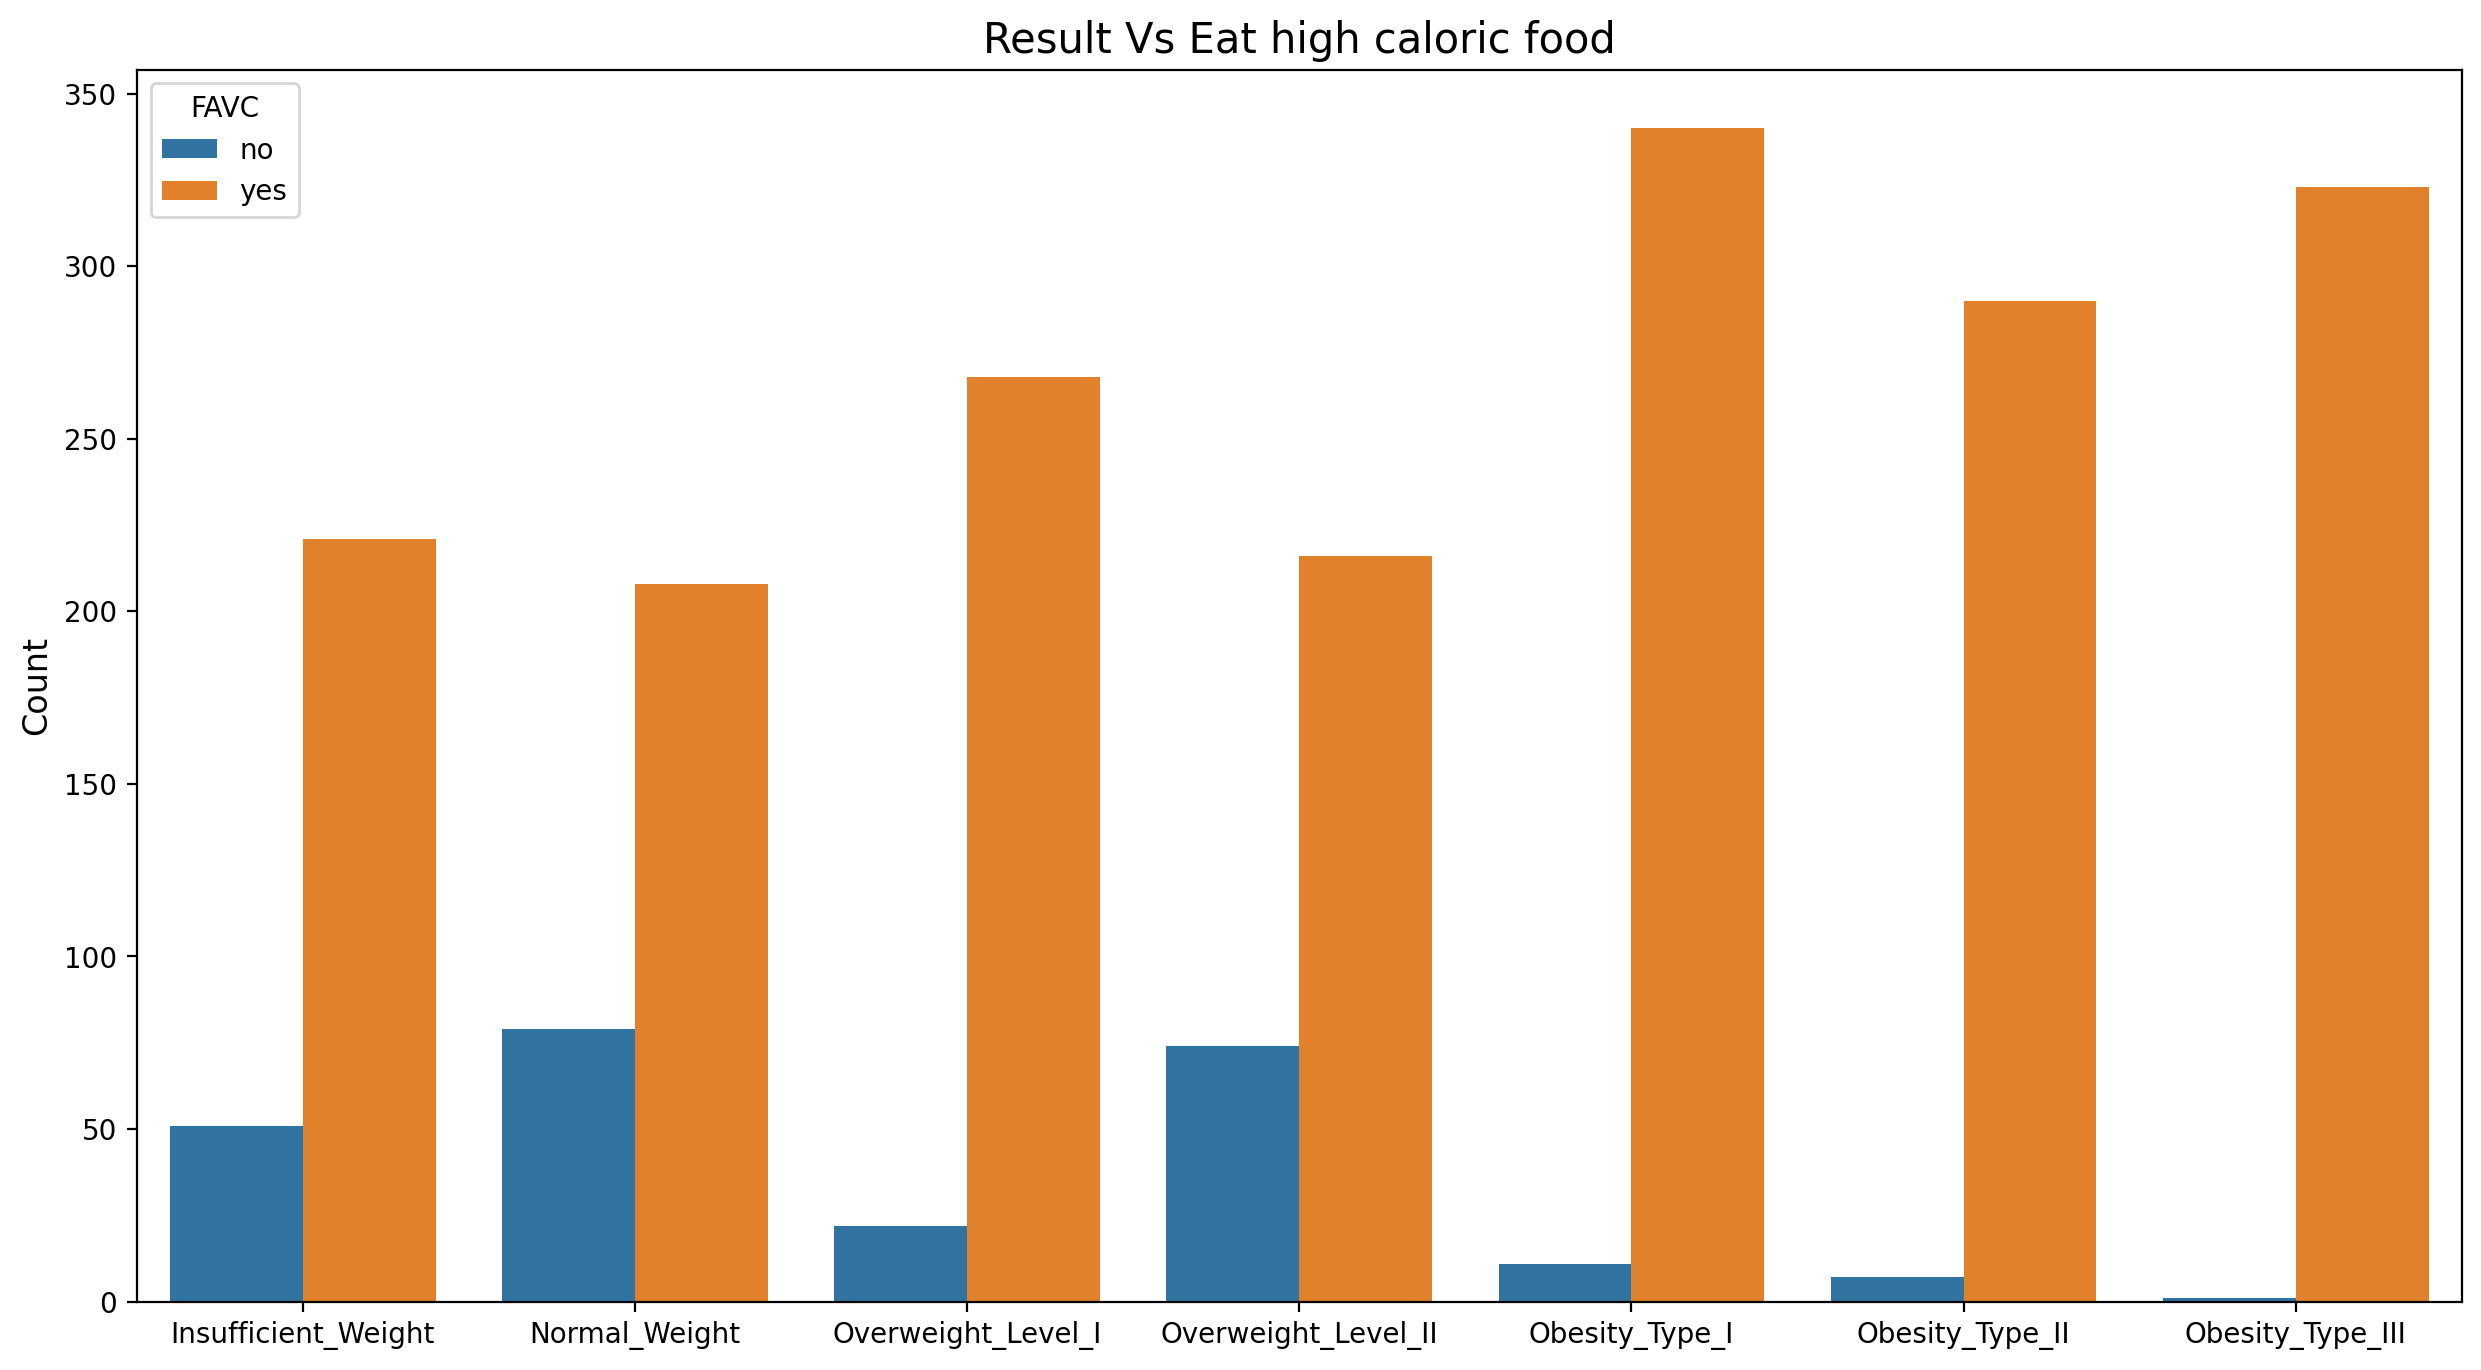

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(x='result',data=df,hue='FAVC',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs Eat high caloric food',fontsize=15)
plt.show()

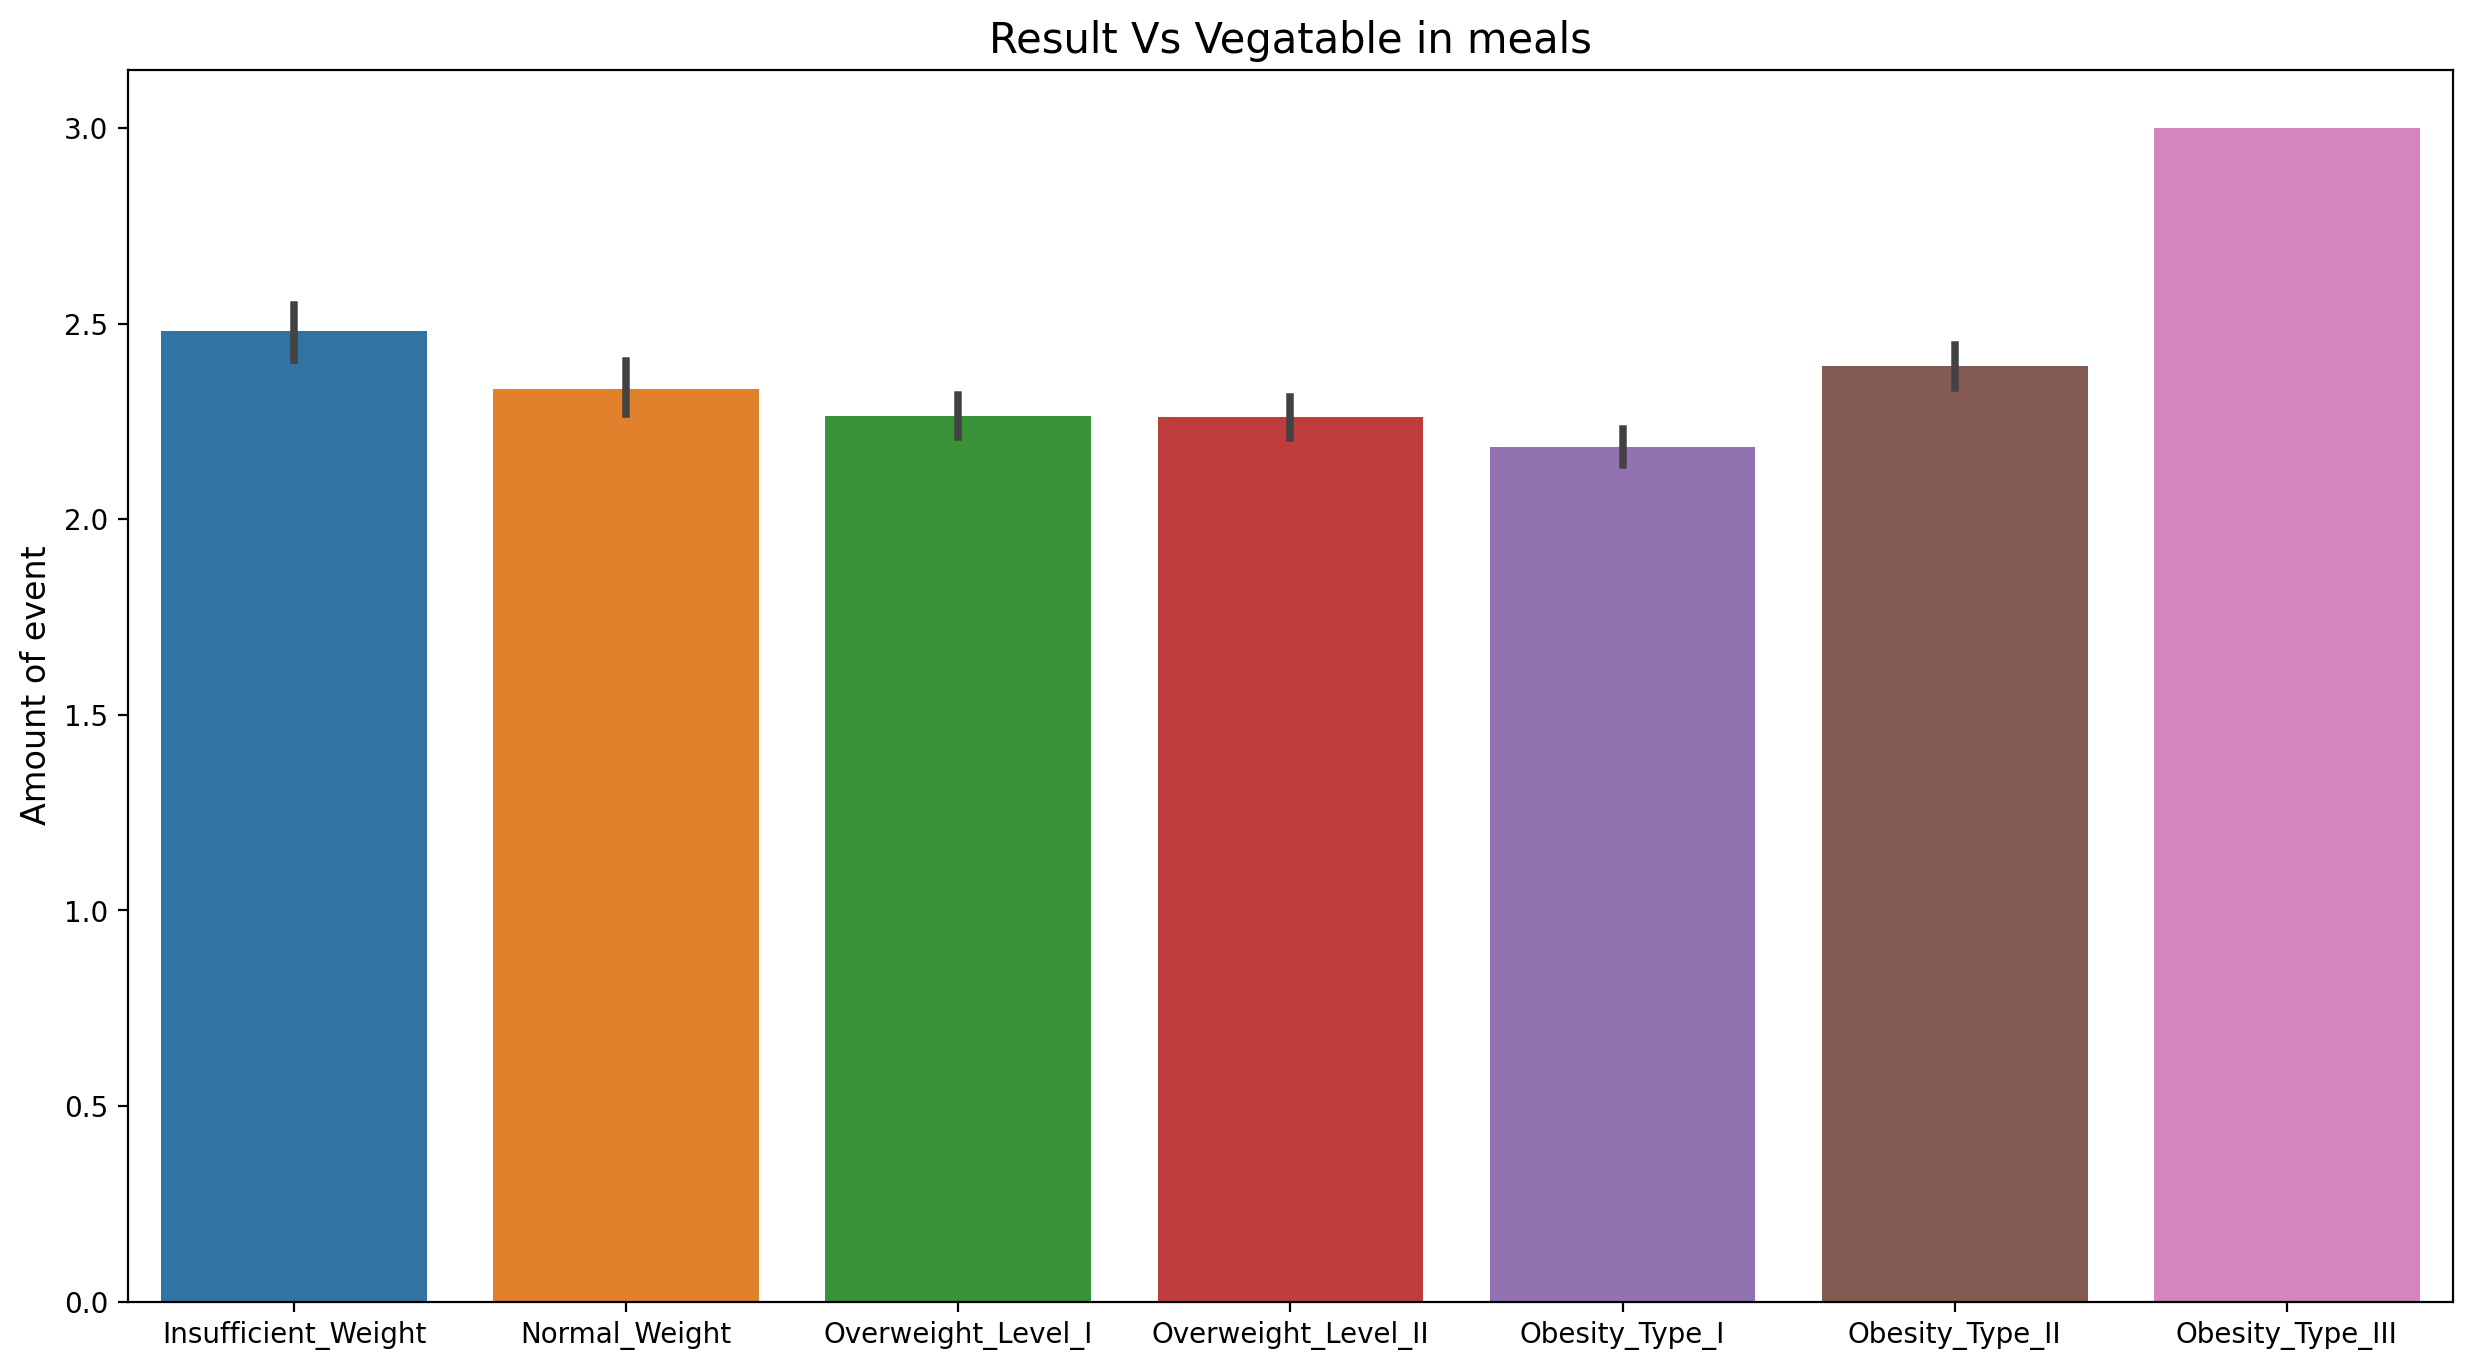

In [14]:
plt.figure(figsize=(15,8))
sns.barplot(x='result',y='FCVC',data=df,
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Amount of event',fontsize=12)
plt.title('Result Vs Vegatable in meals',fontsize=15)
plt.show()

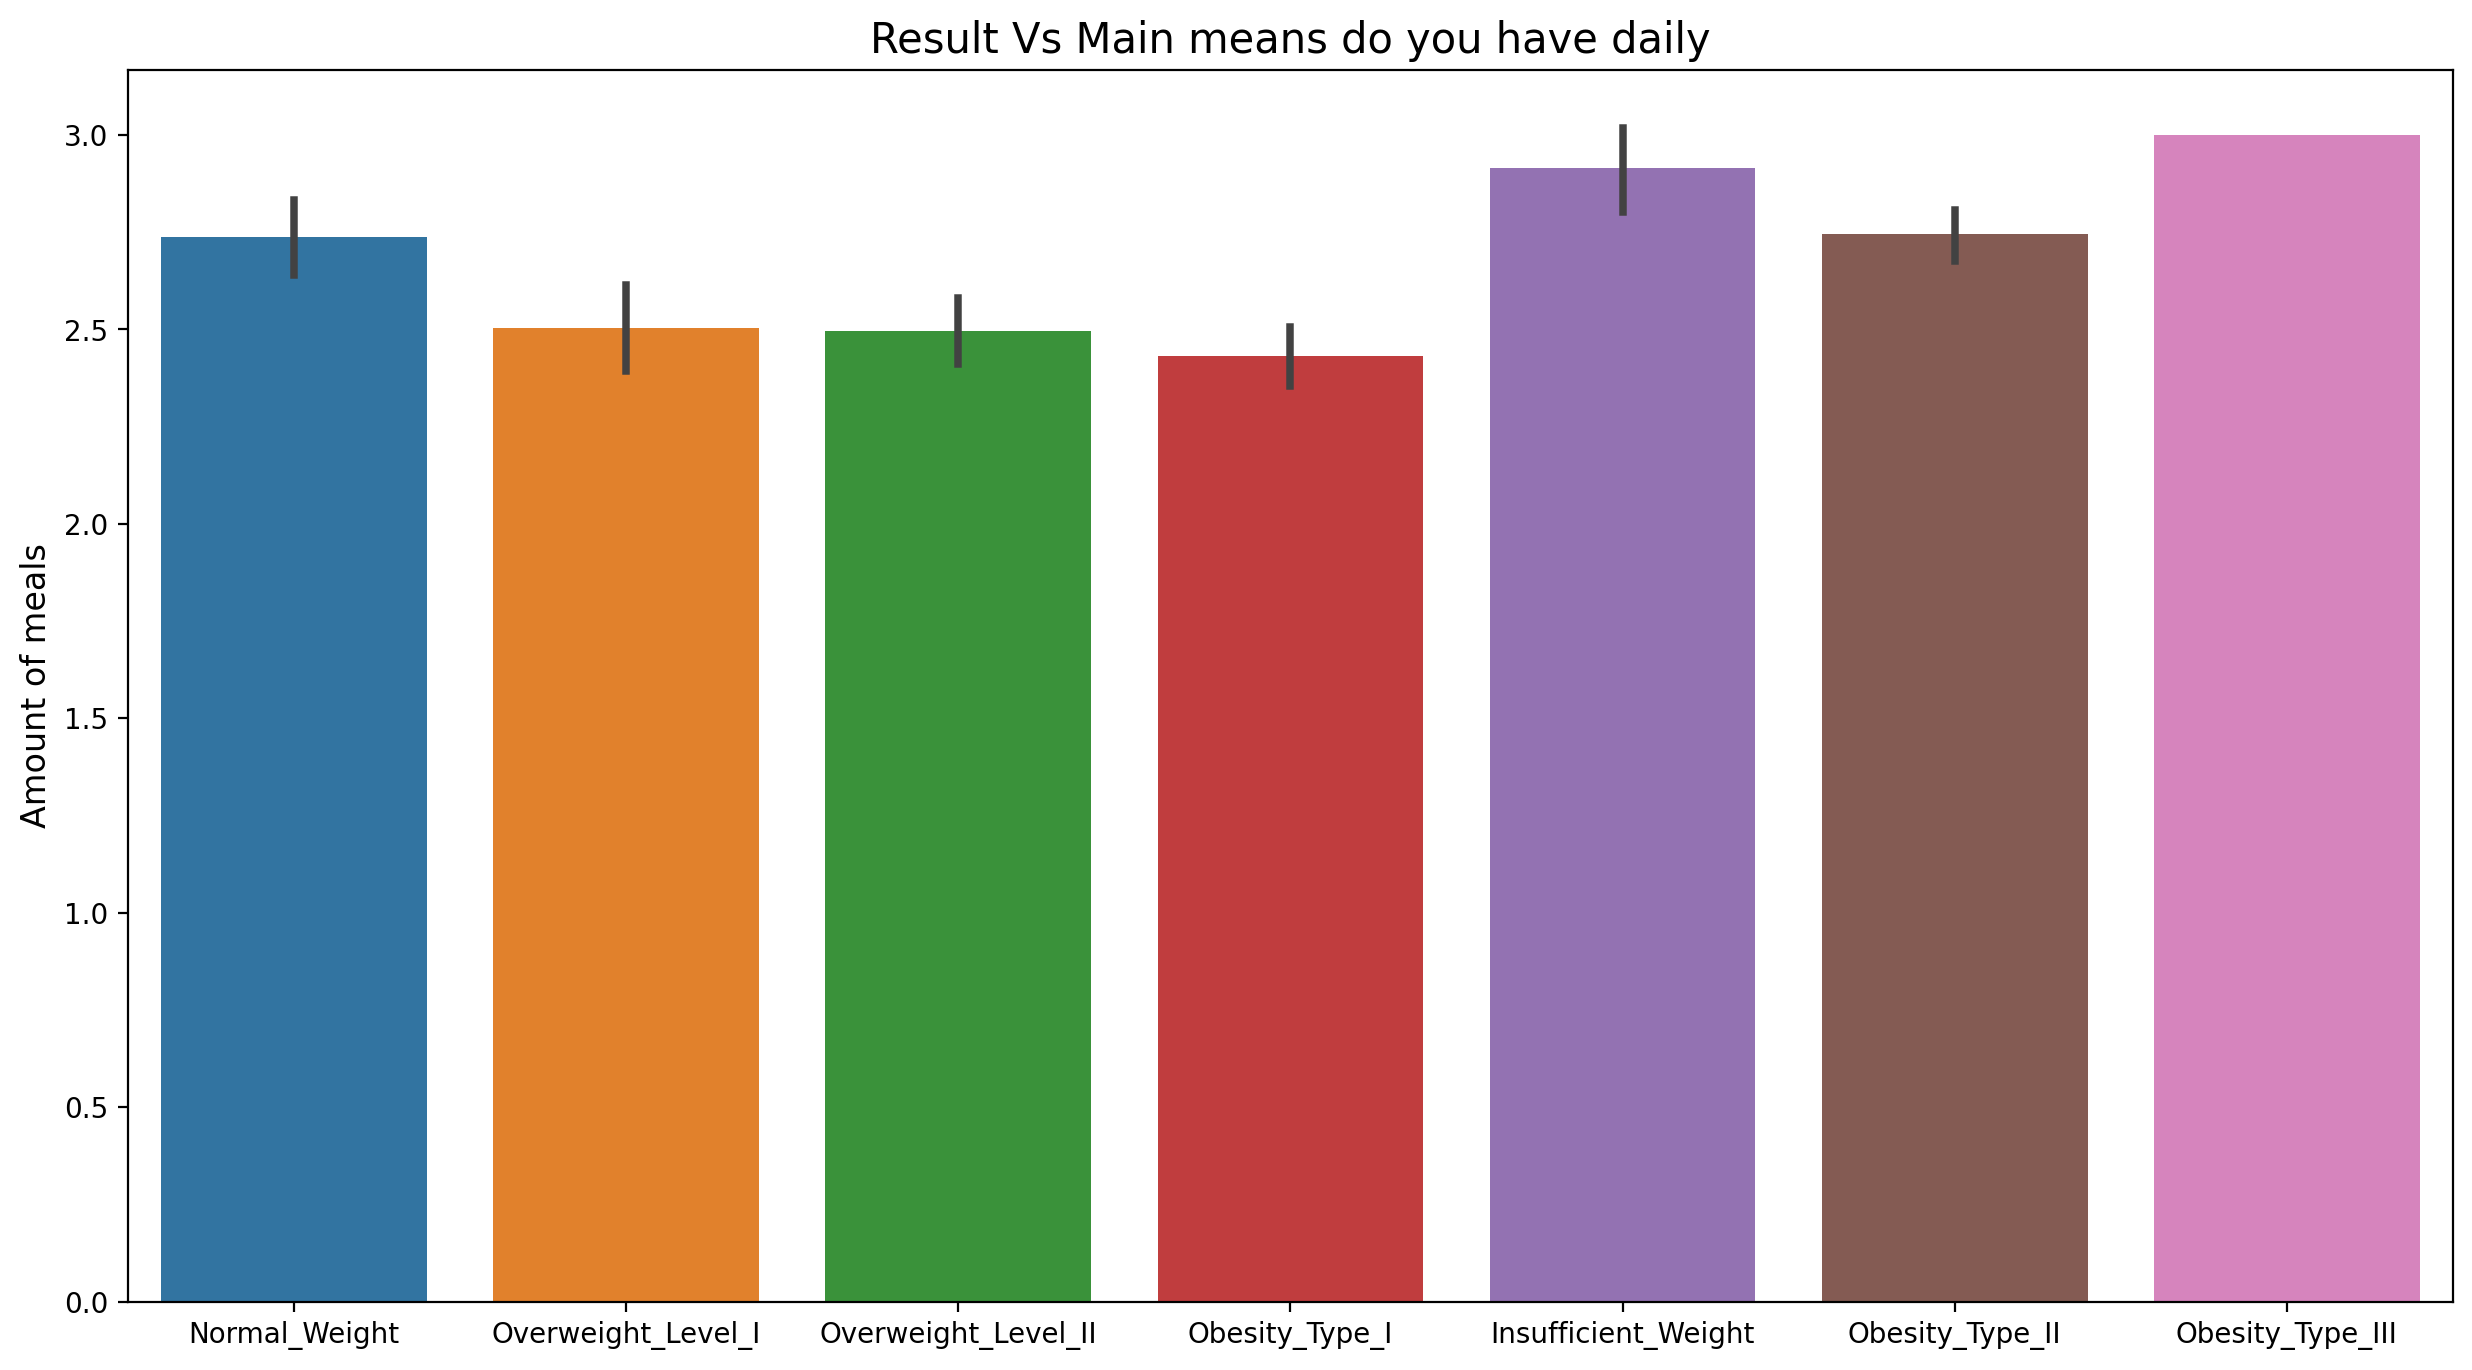

In [15]:
plt.figure(figsize=(15,8))
sns.barplot(x='result',y='NCP',data=df,hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Amount of meals',fontsize=12)
plt.title('Result Vs Main means do you have daily',fontsize=15)
plt.show()

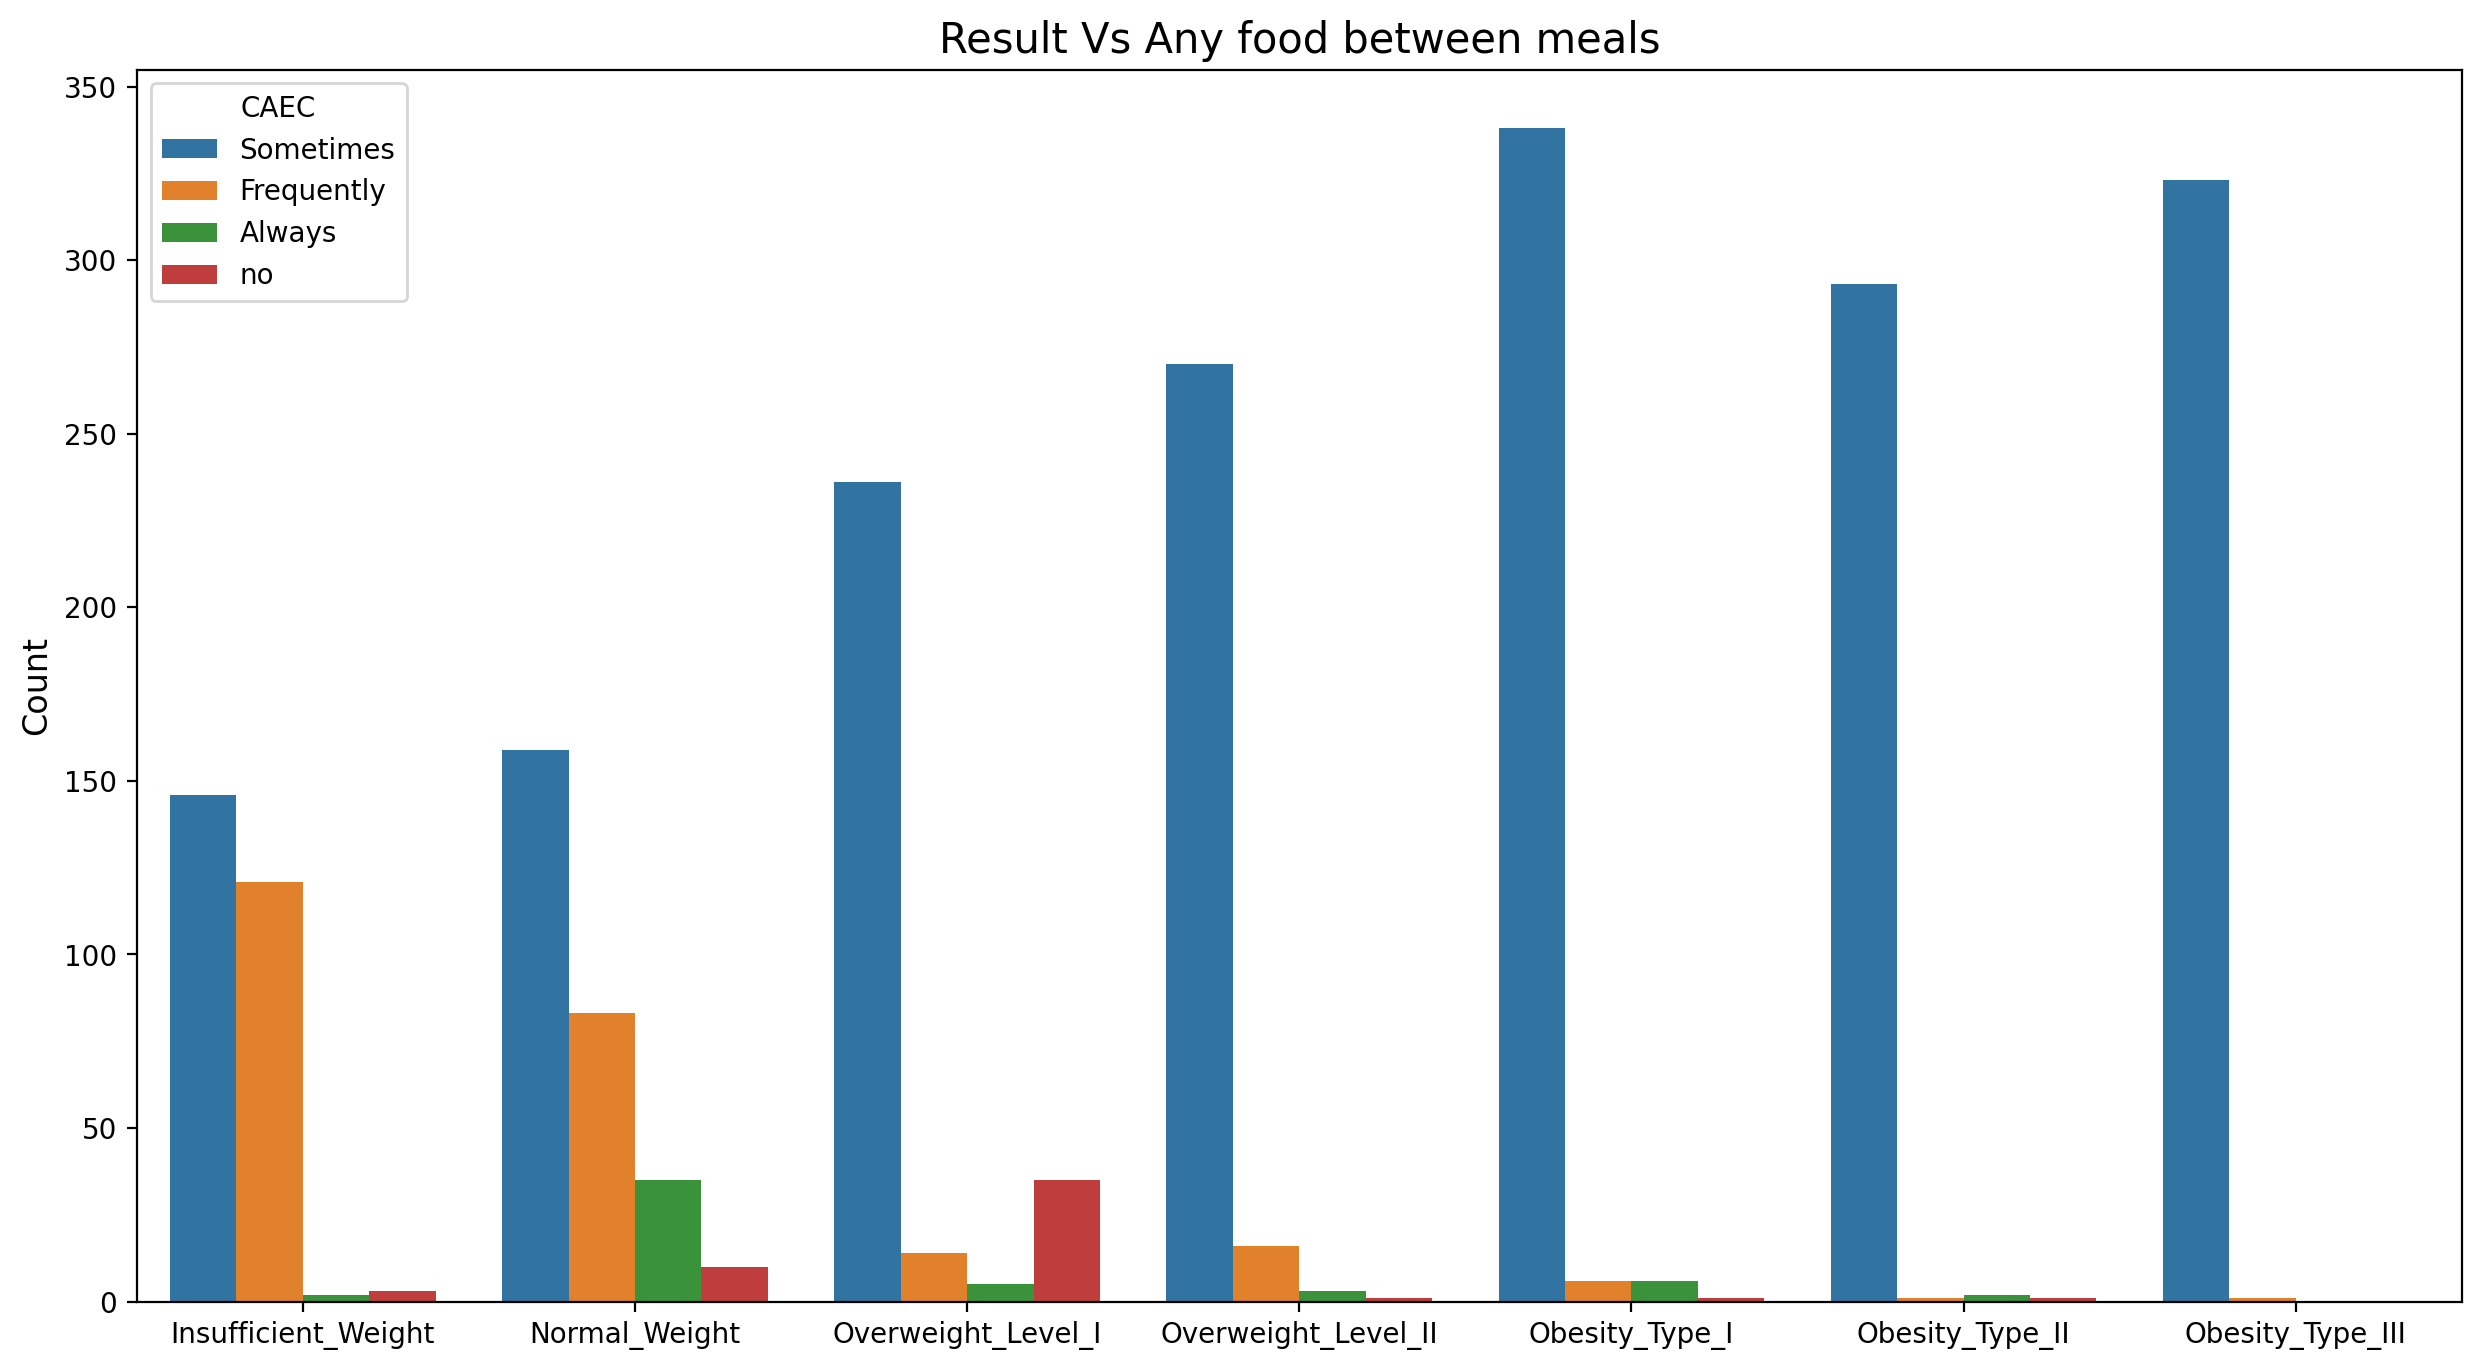

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(x='result',data=df,hue='CAEC',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs Any food between meals',fontsize=15)
plt.show()

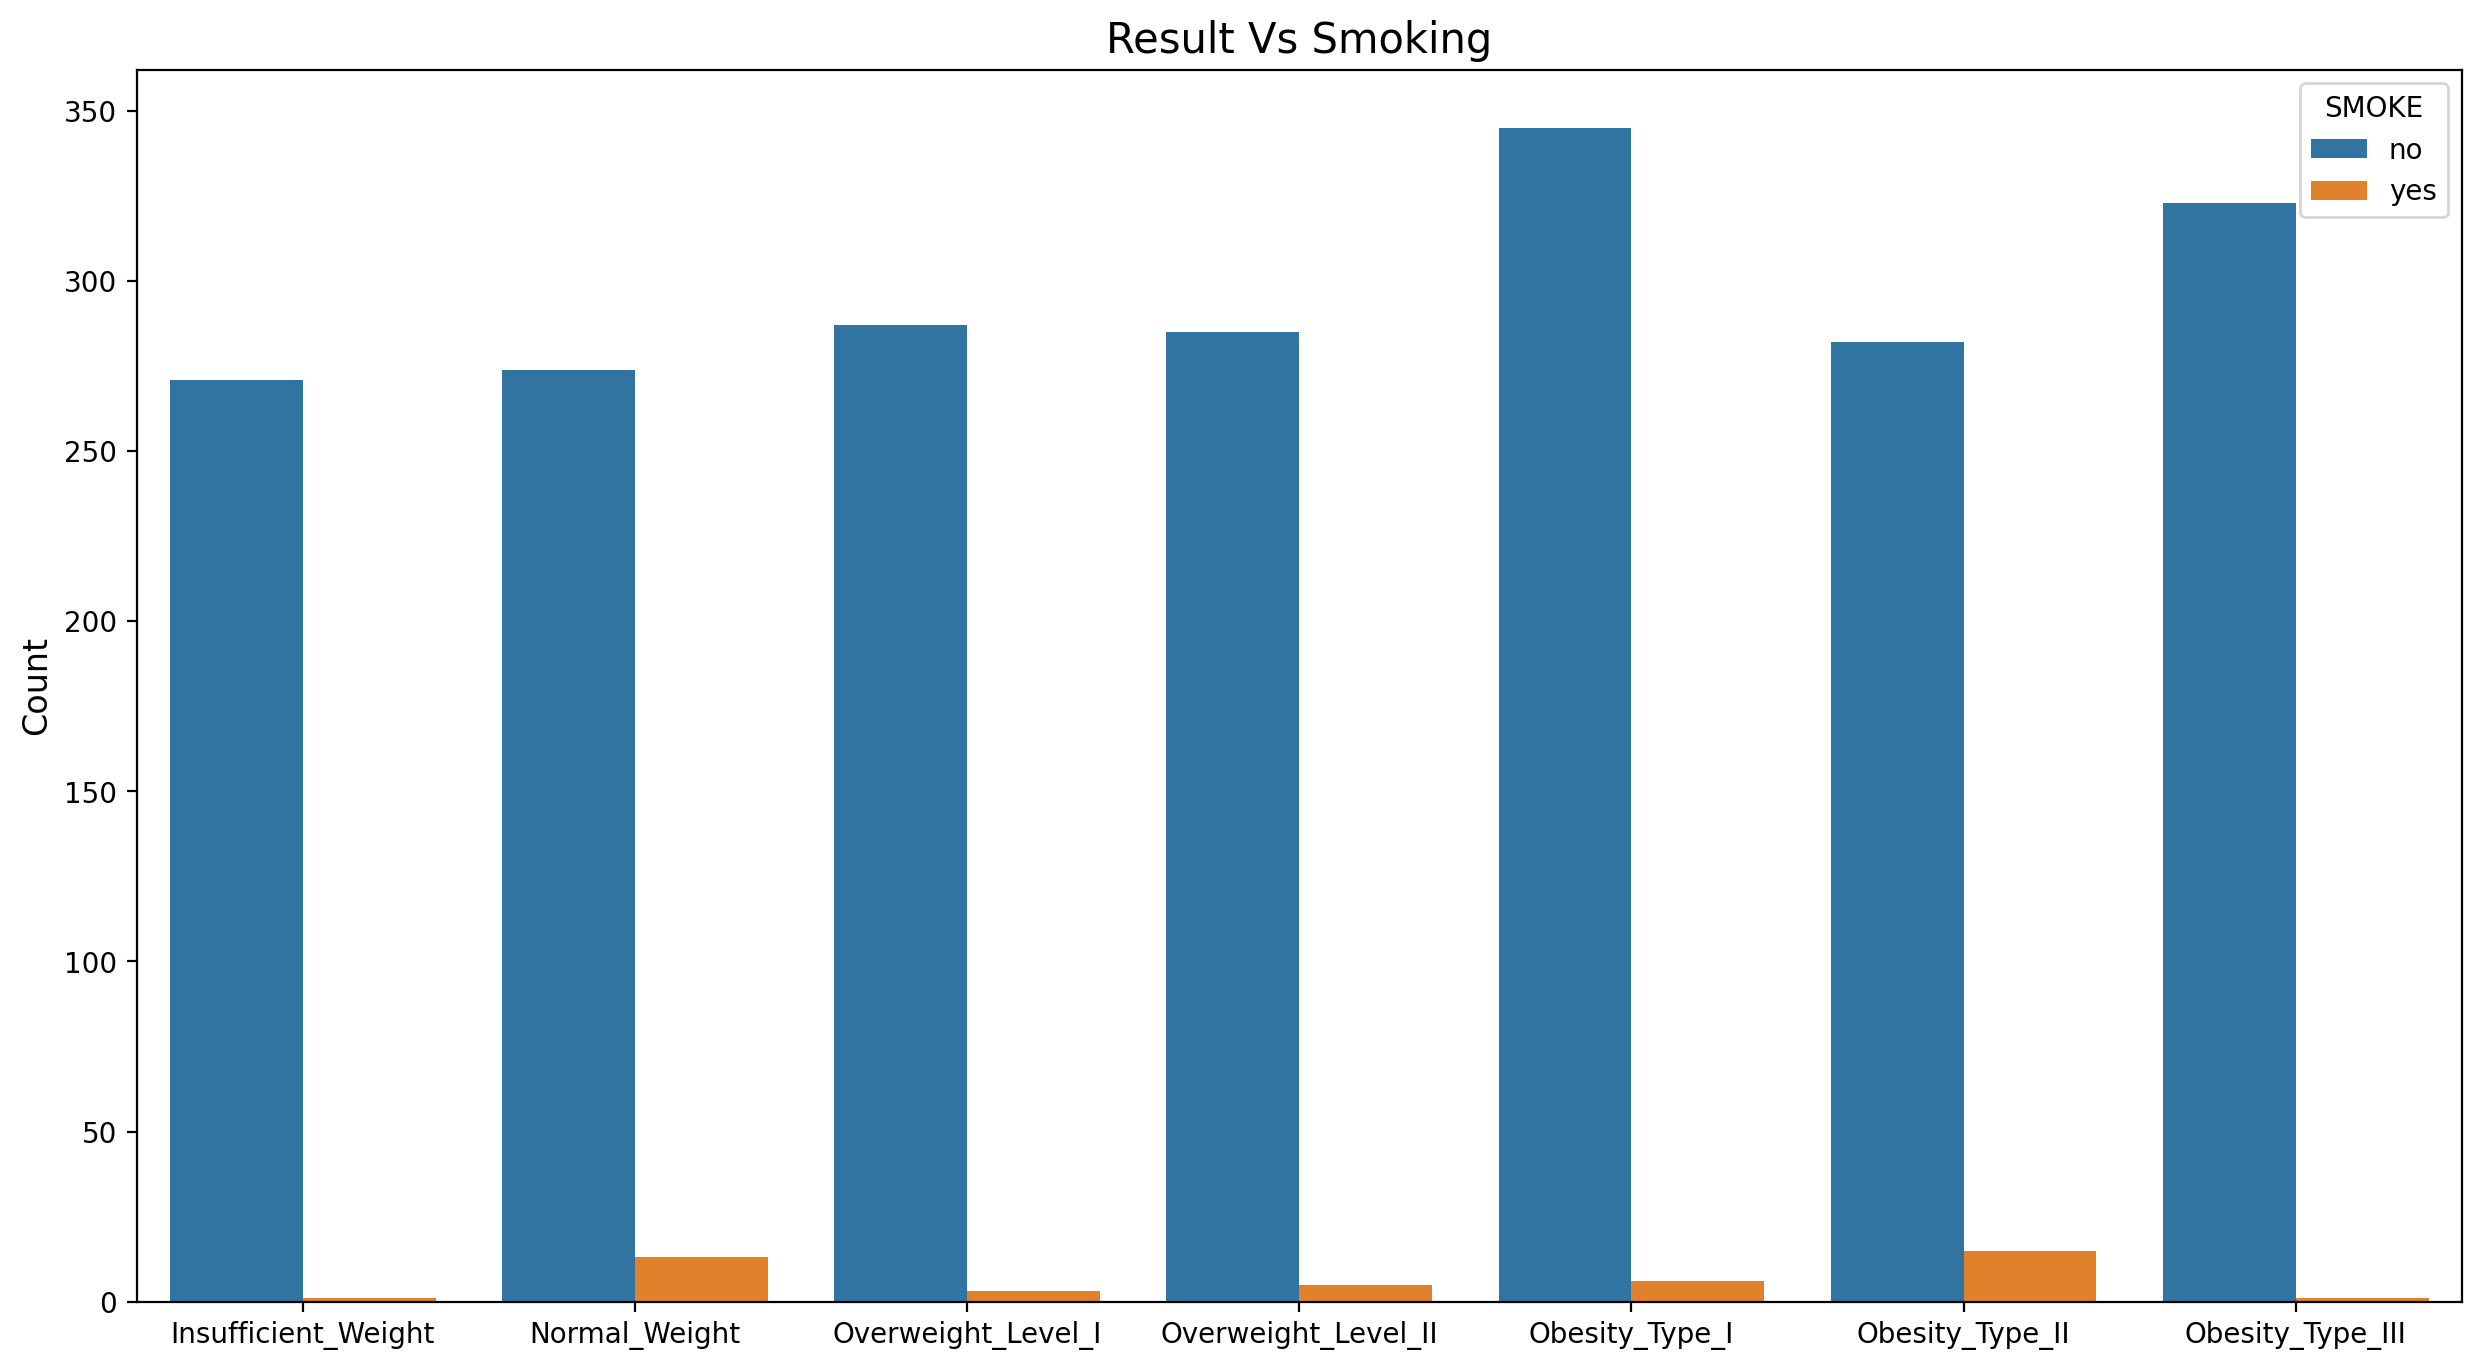

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(x='result',data=df,hue='SMOKE',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs Smoking',fontsize=15)
plt.show()

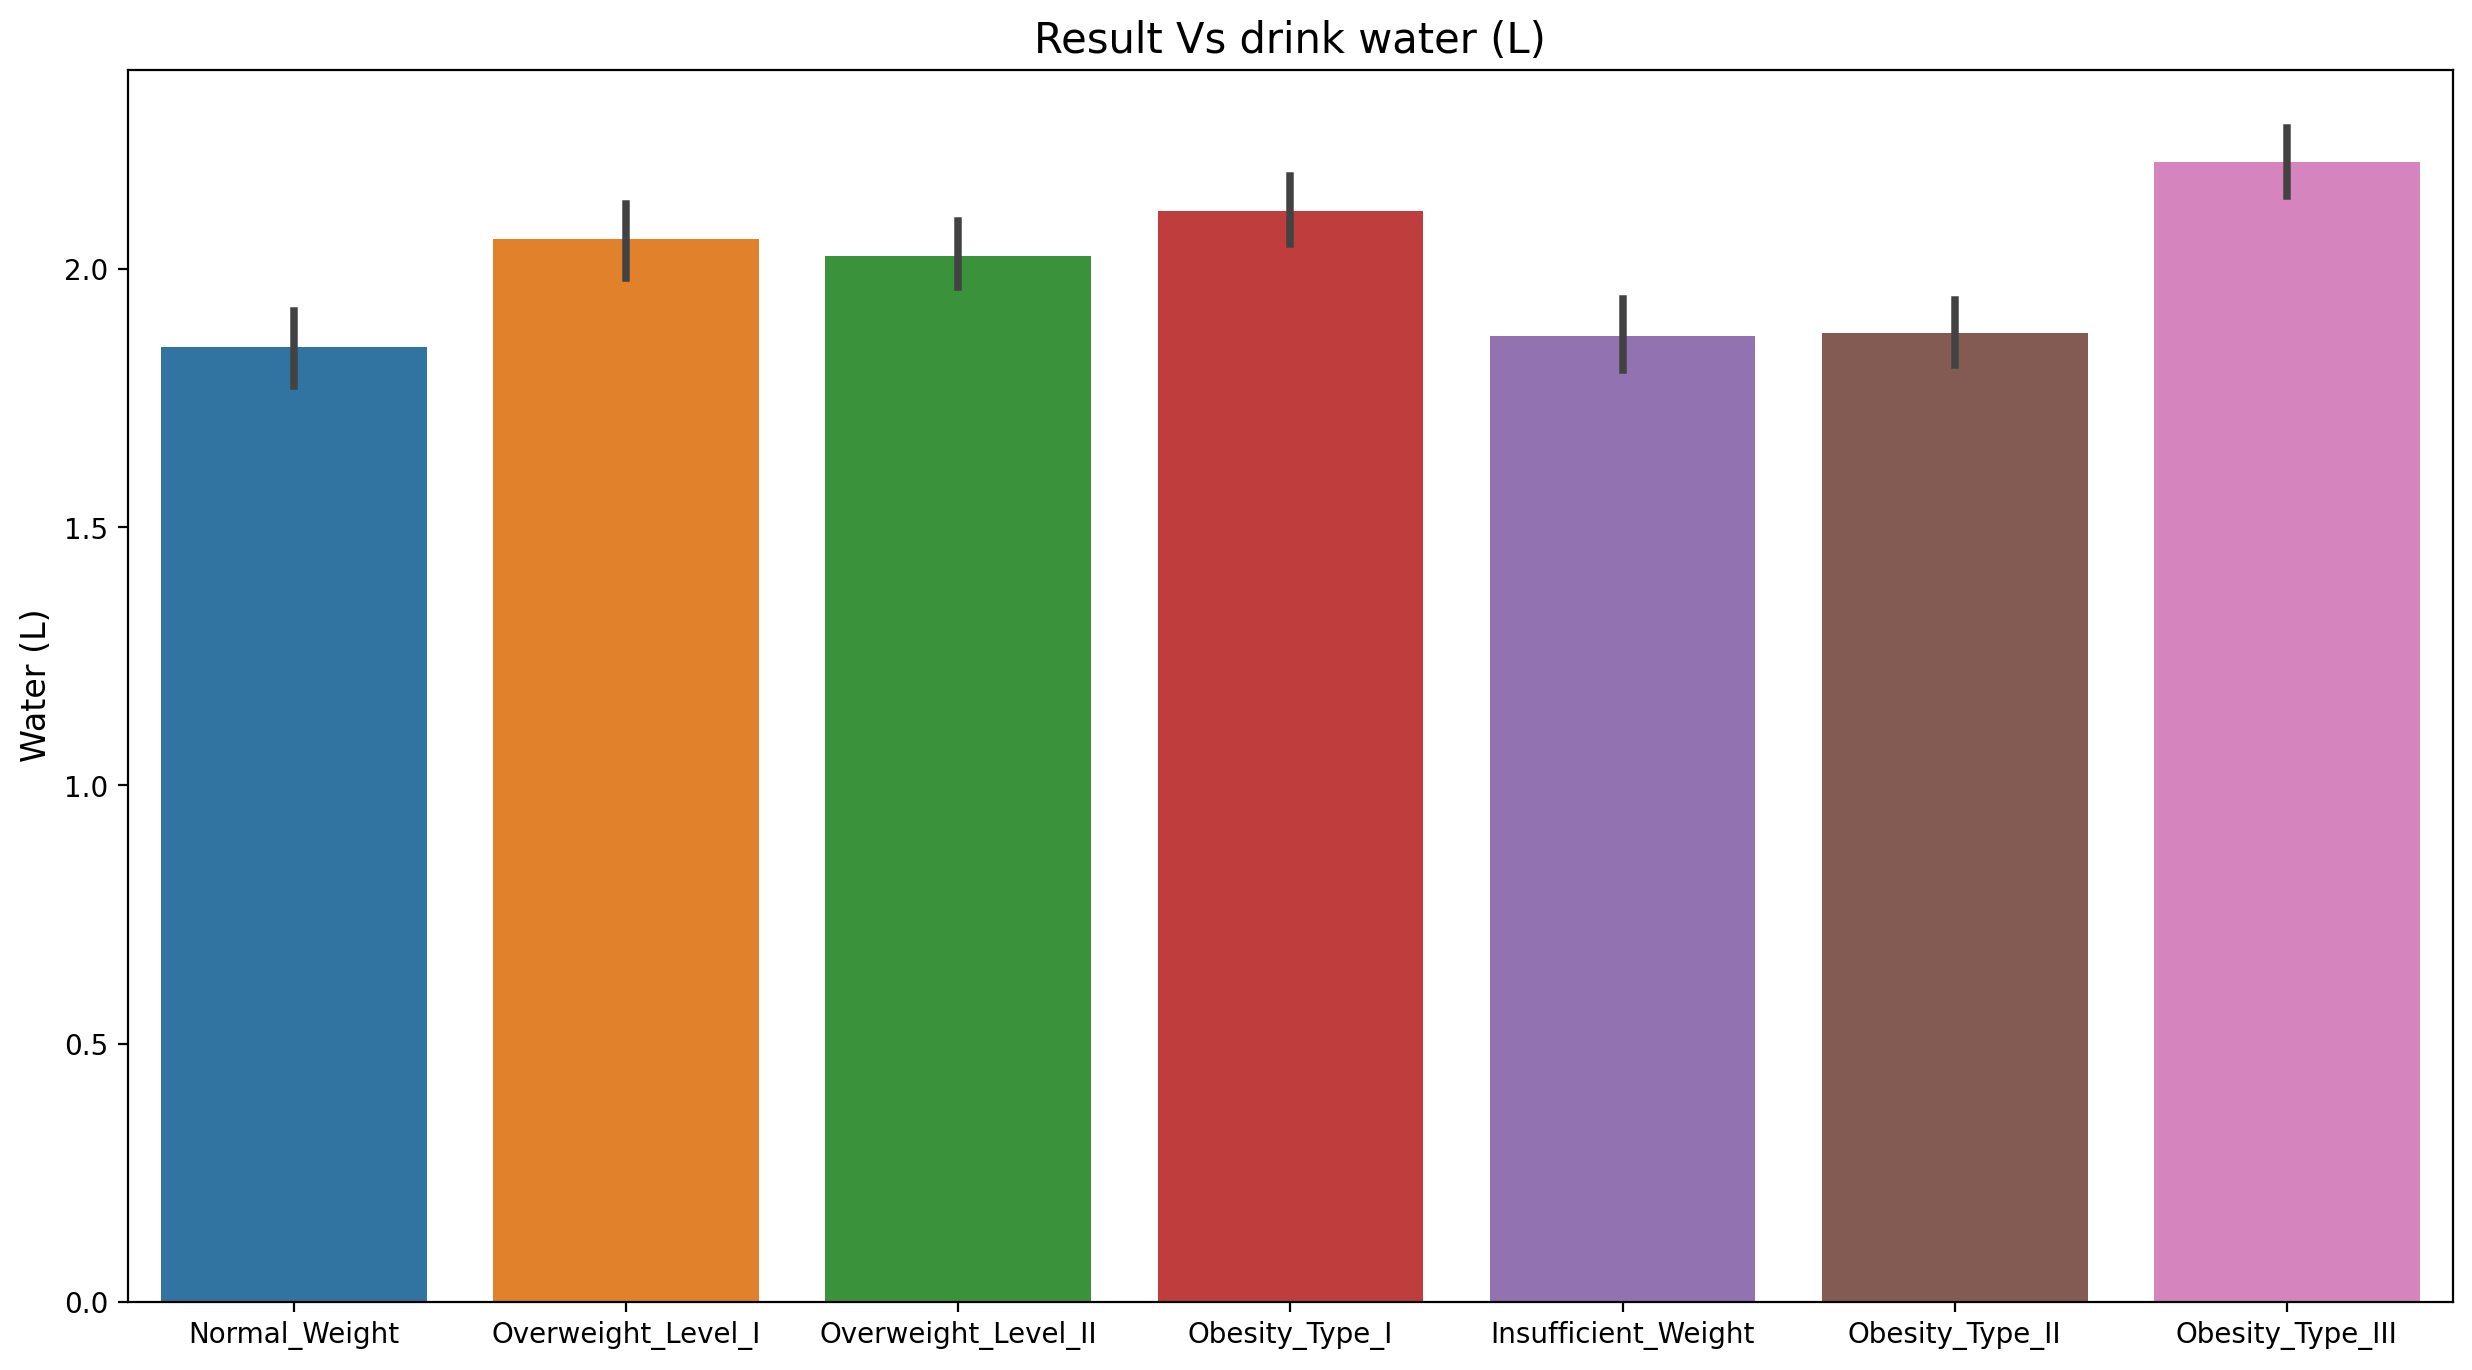

In [18]:
plt.figure(figsize=(15,8))
sns.barplot(x='result',y='CH2O',data=df,hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Water (L)',fontsize=12)
plt.title('Result Vs drink water (L)',fontsize=15)
plt.show()

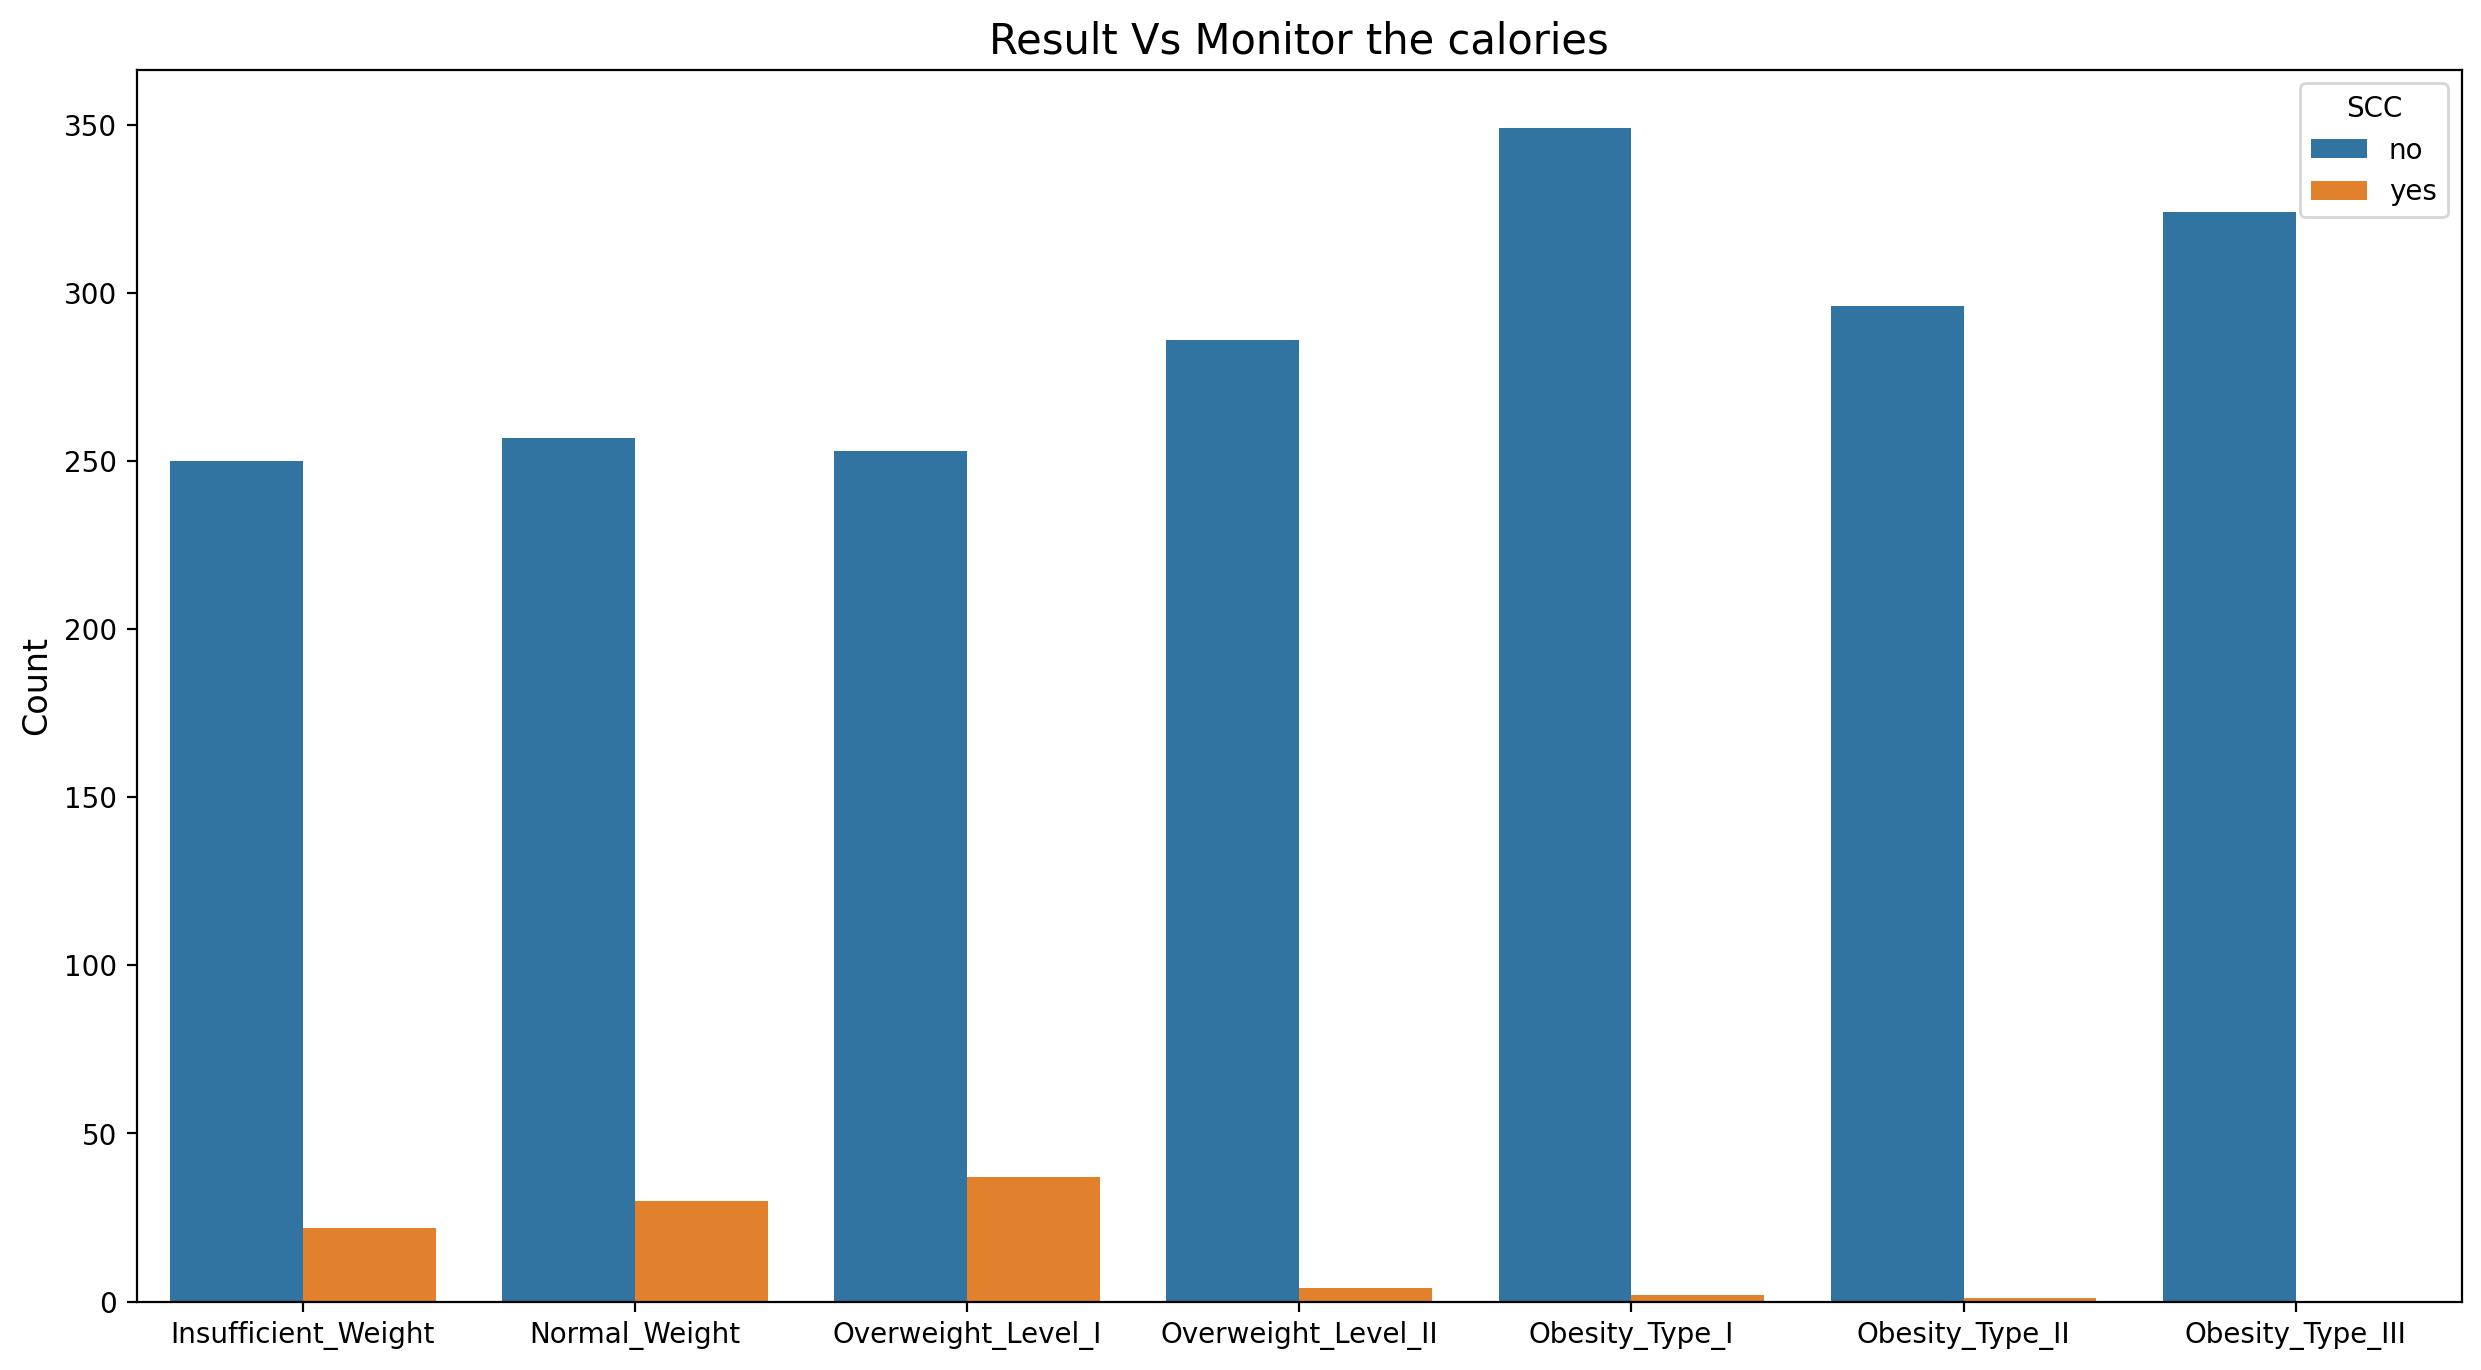

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(x='result',data=df,hue='SCC',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs Monitor the calories',fontsize=15)
plt.show()

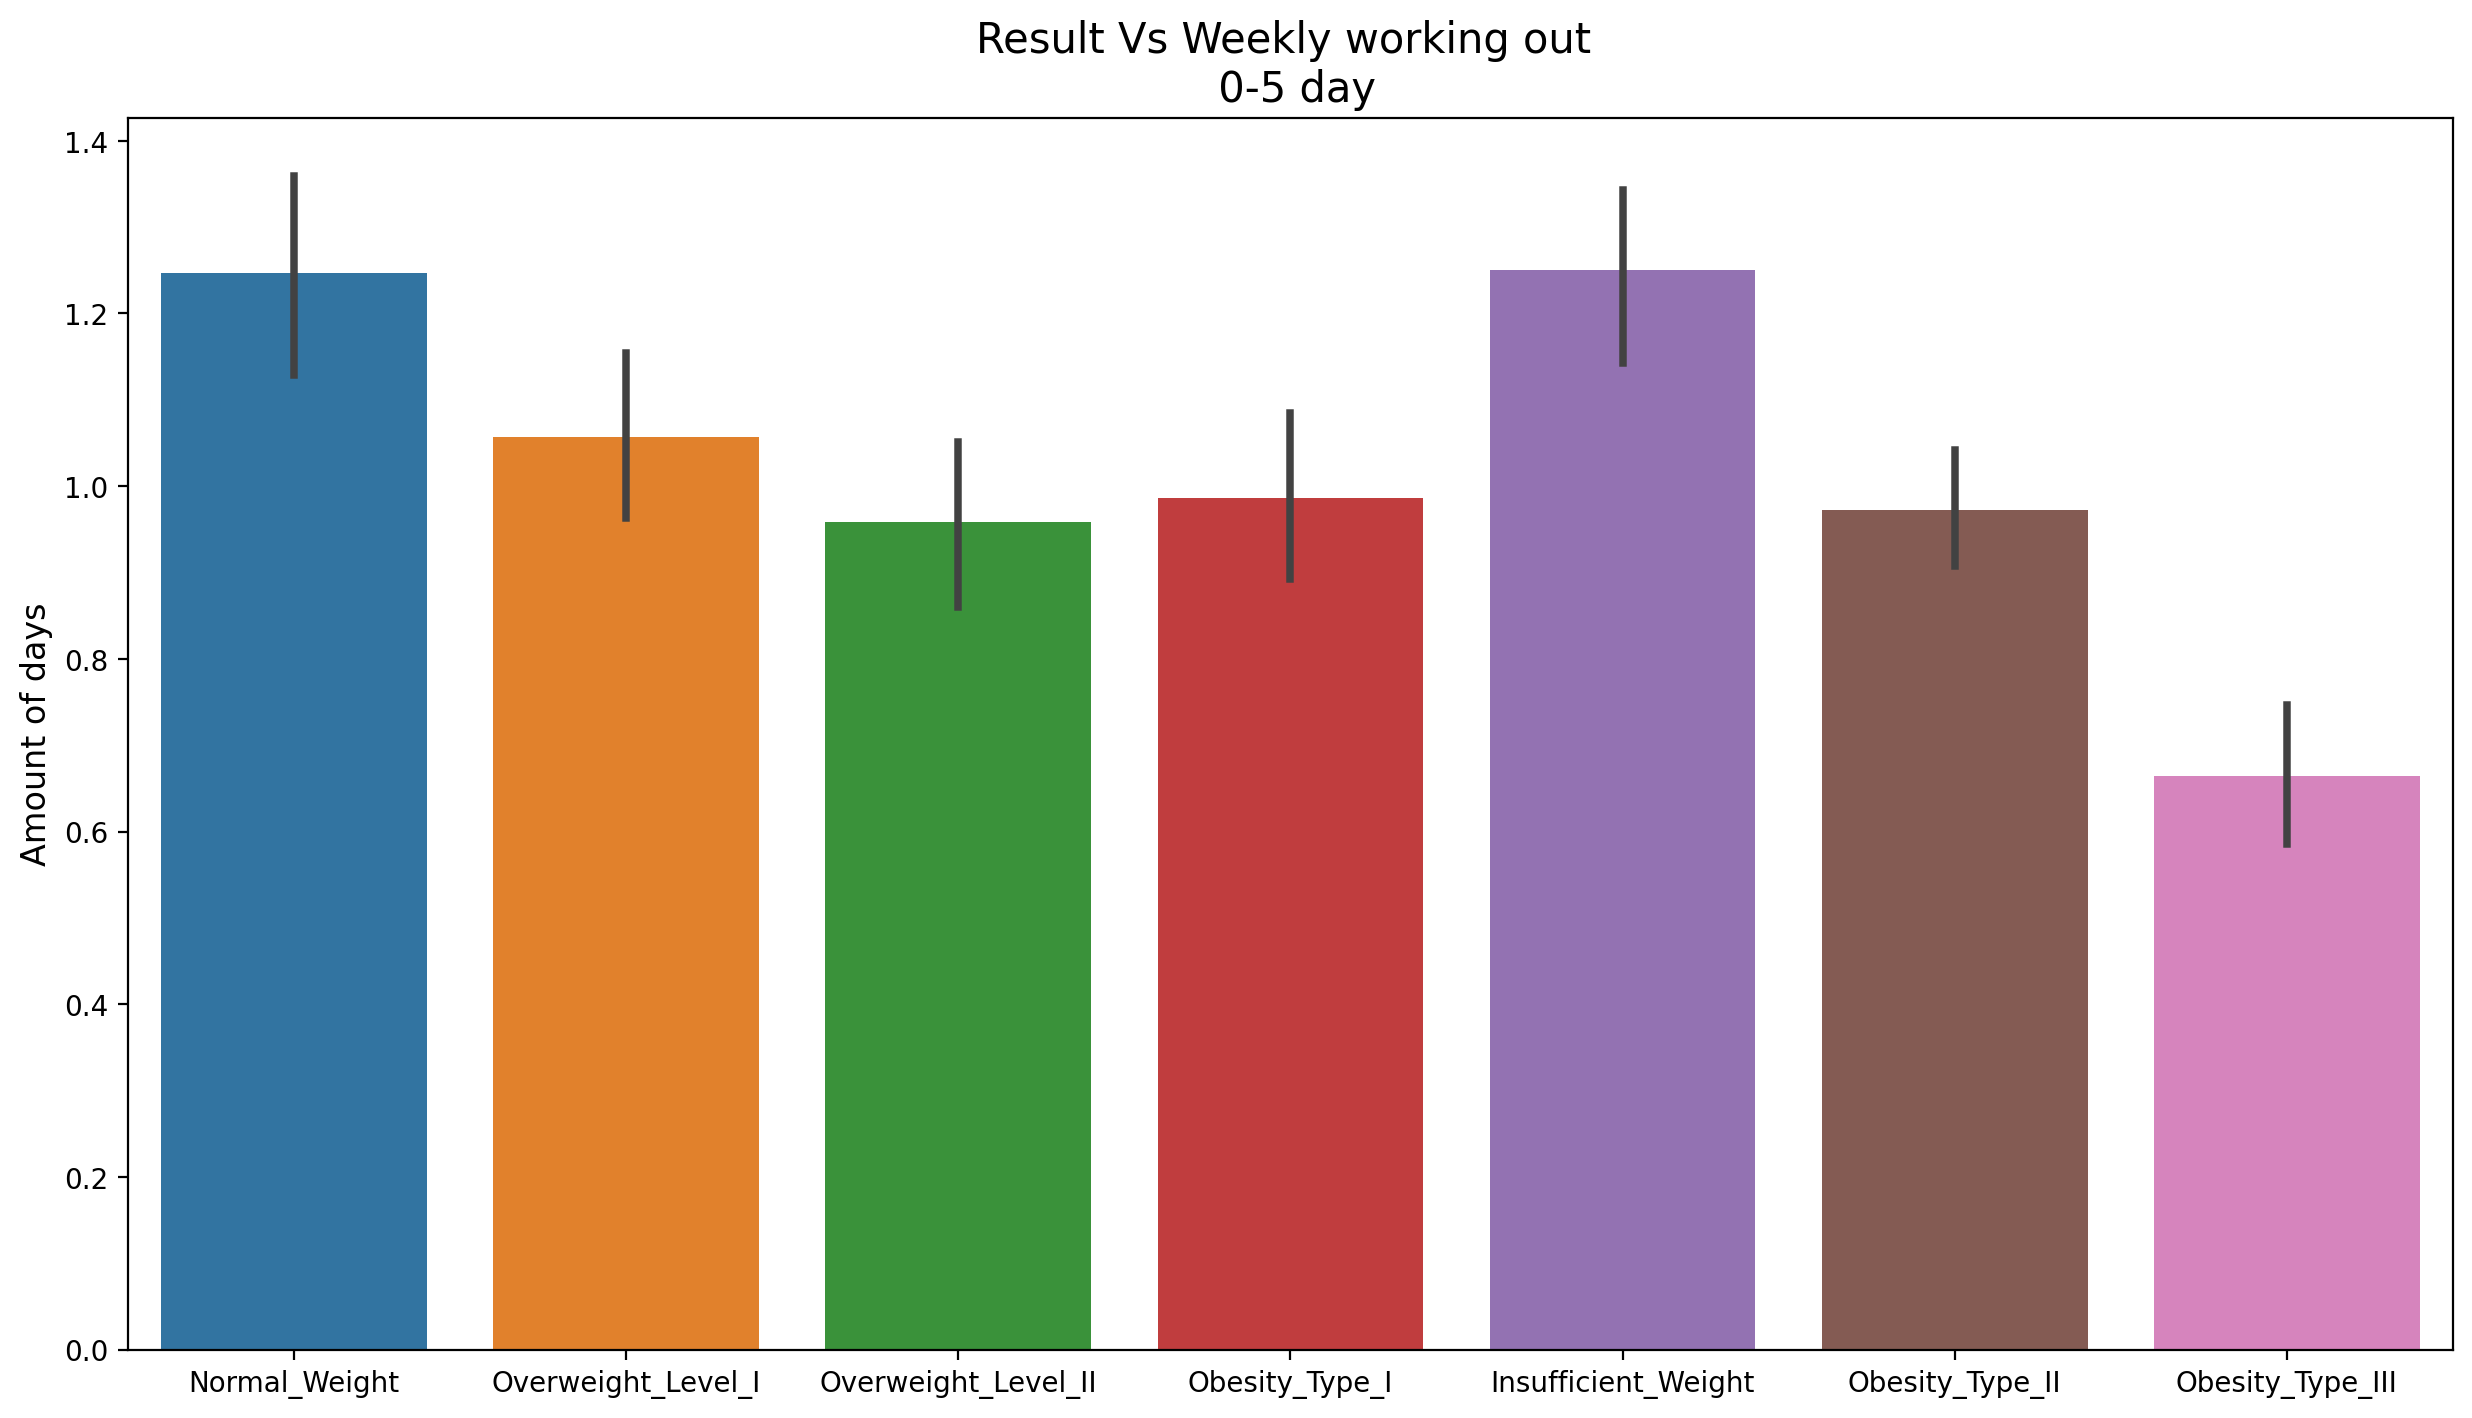

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(x='result',y='FAF',data=df,hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.ylabel('Amount of days',fontsize=12)
plt.xlabel(None)
plt.title('Result Vs Weekly working out \n 0-5 day',fontsize=15)
plt.show()

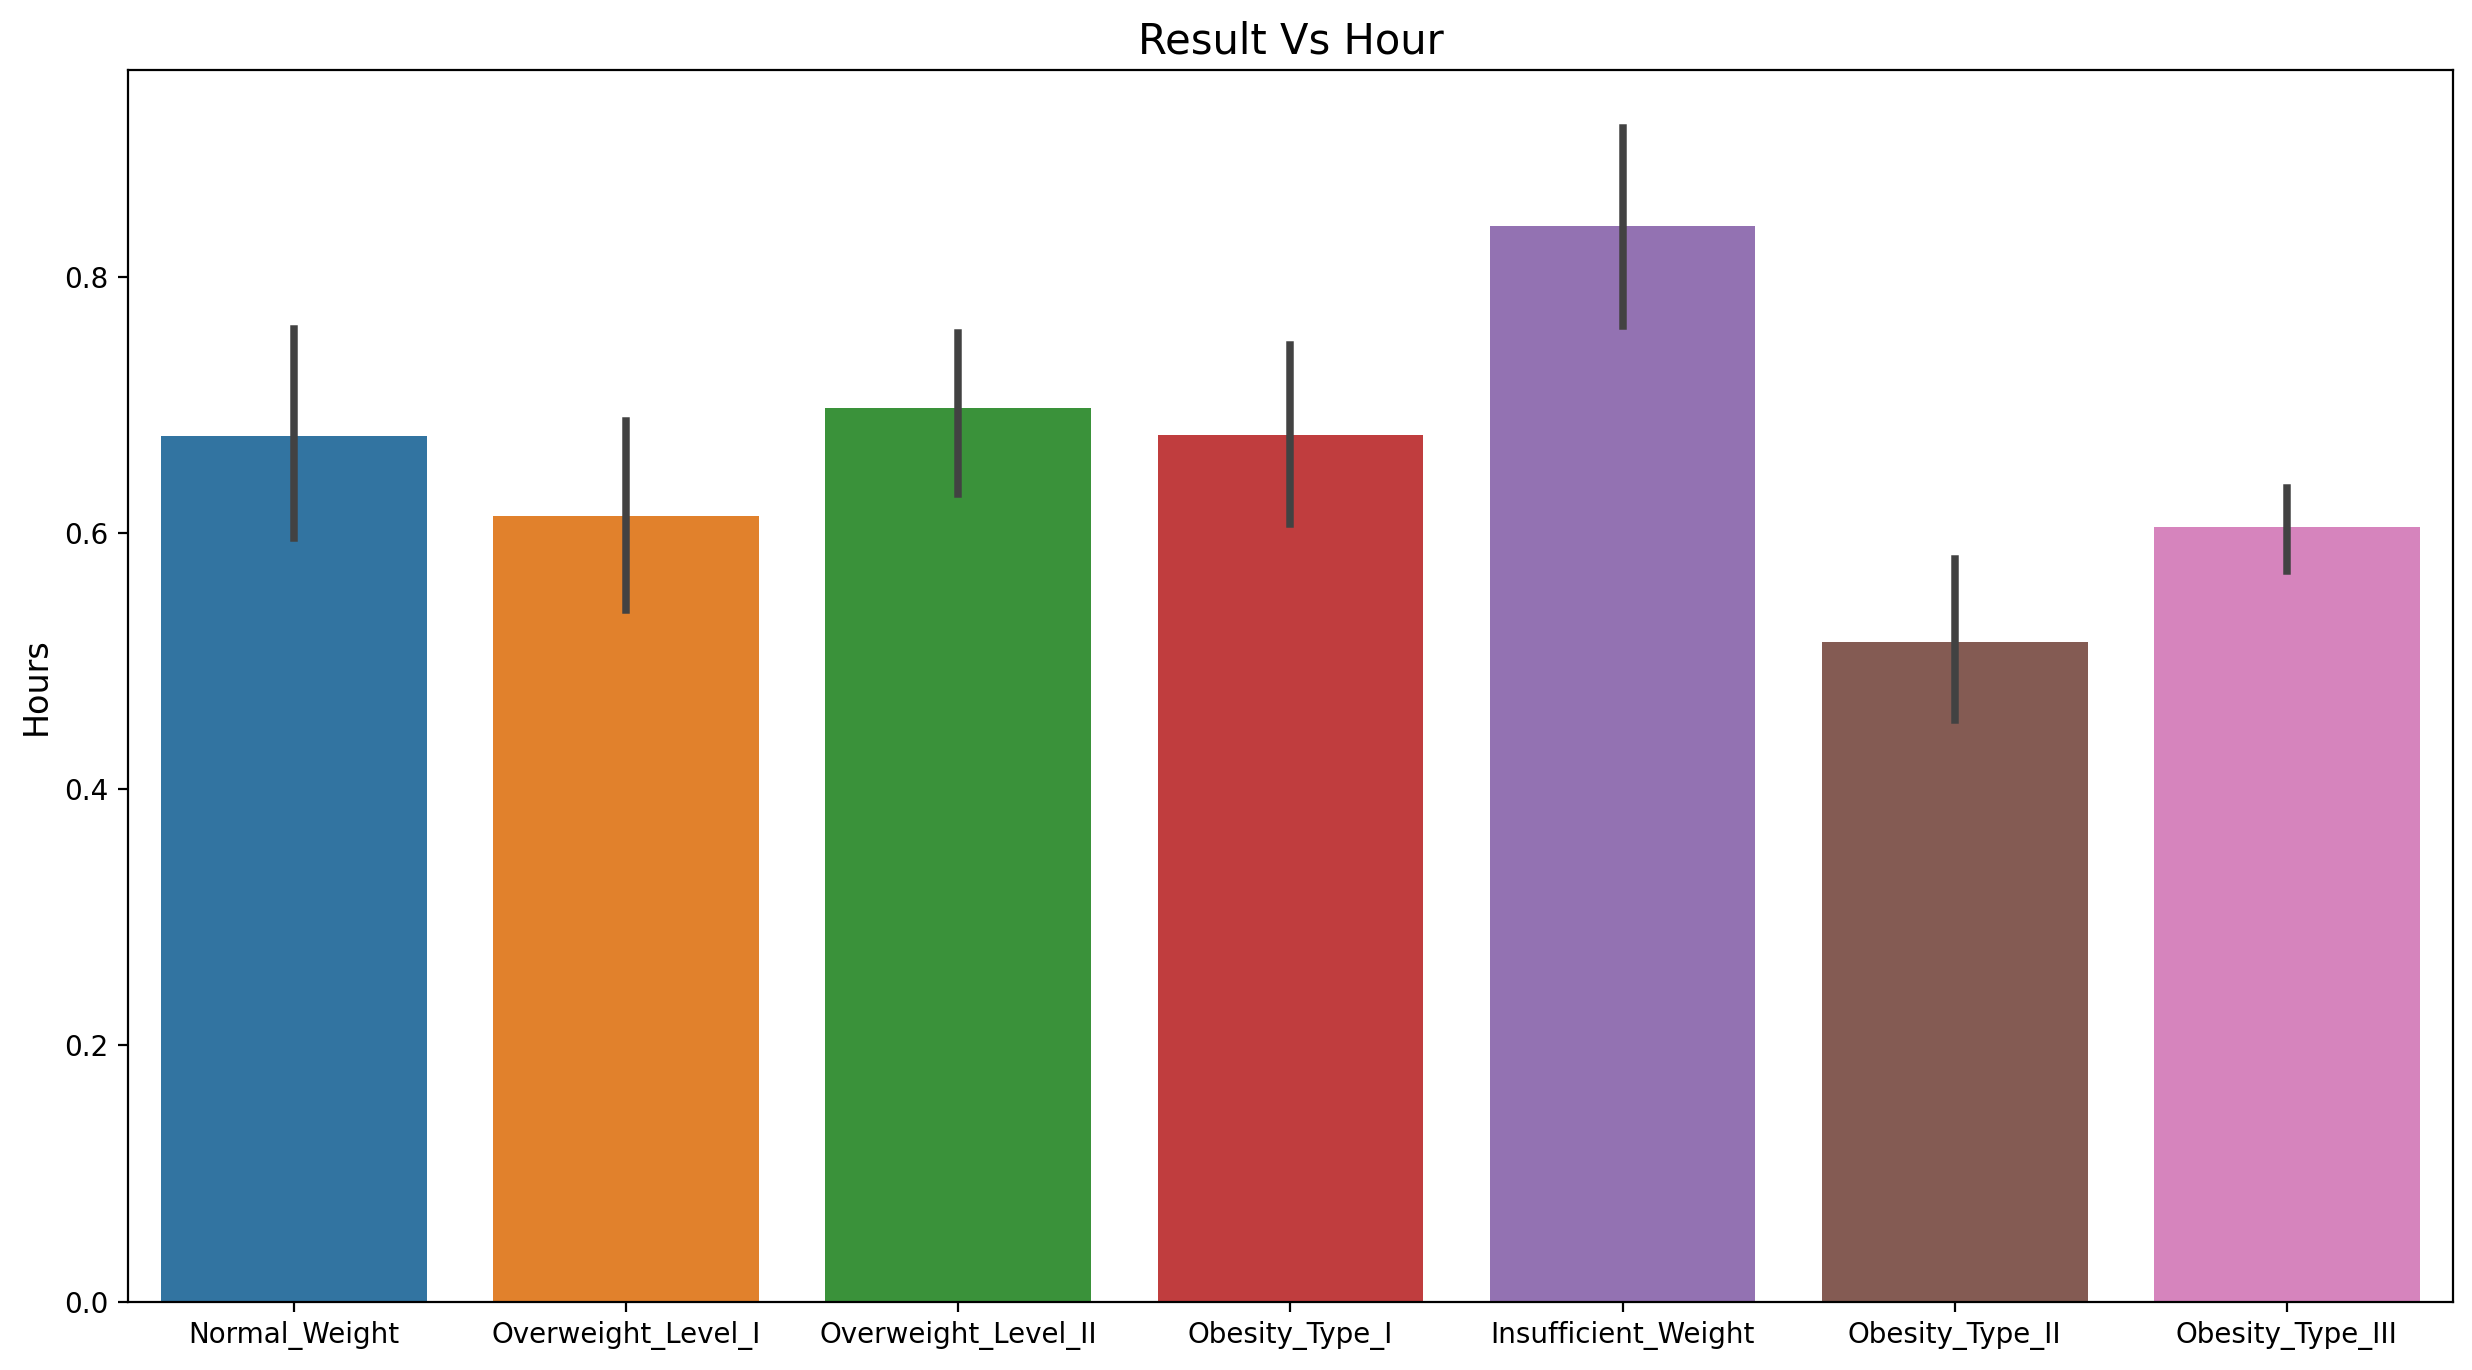

In [21]:
plt.figure(figsize=(15,8))
sns.barplot(x='result',y='TUE',data=df,hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Hours',fontsize=12)
plt.title('Result Vs Hour',fontsize=15)
plt.show()

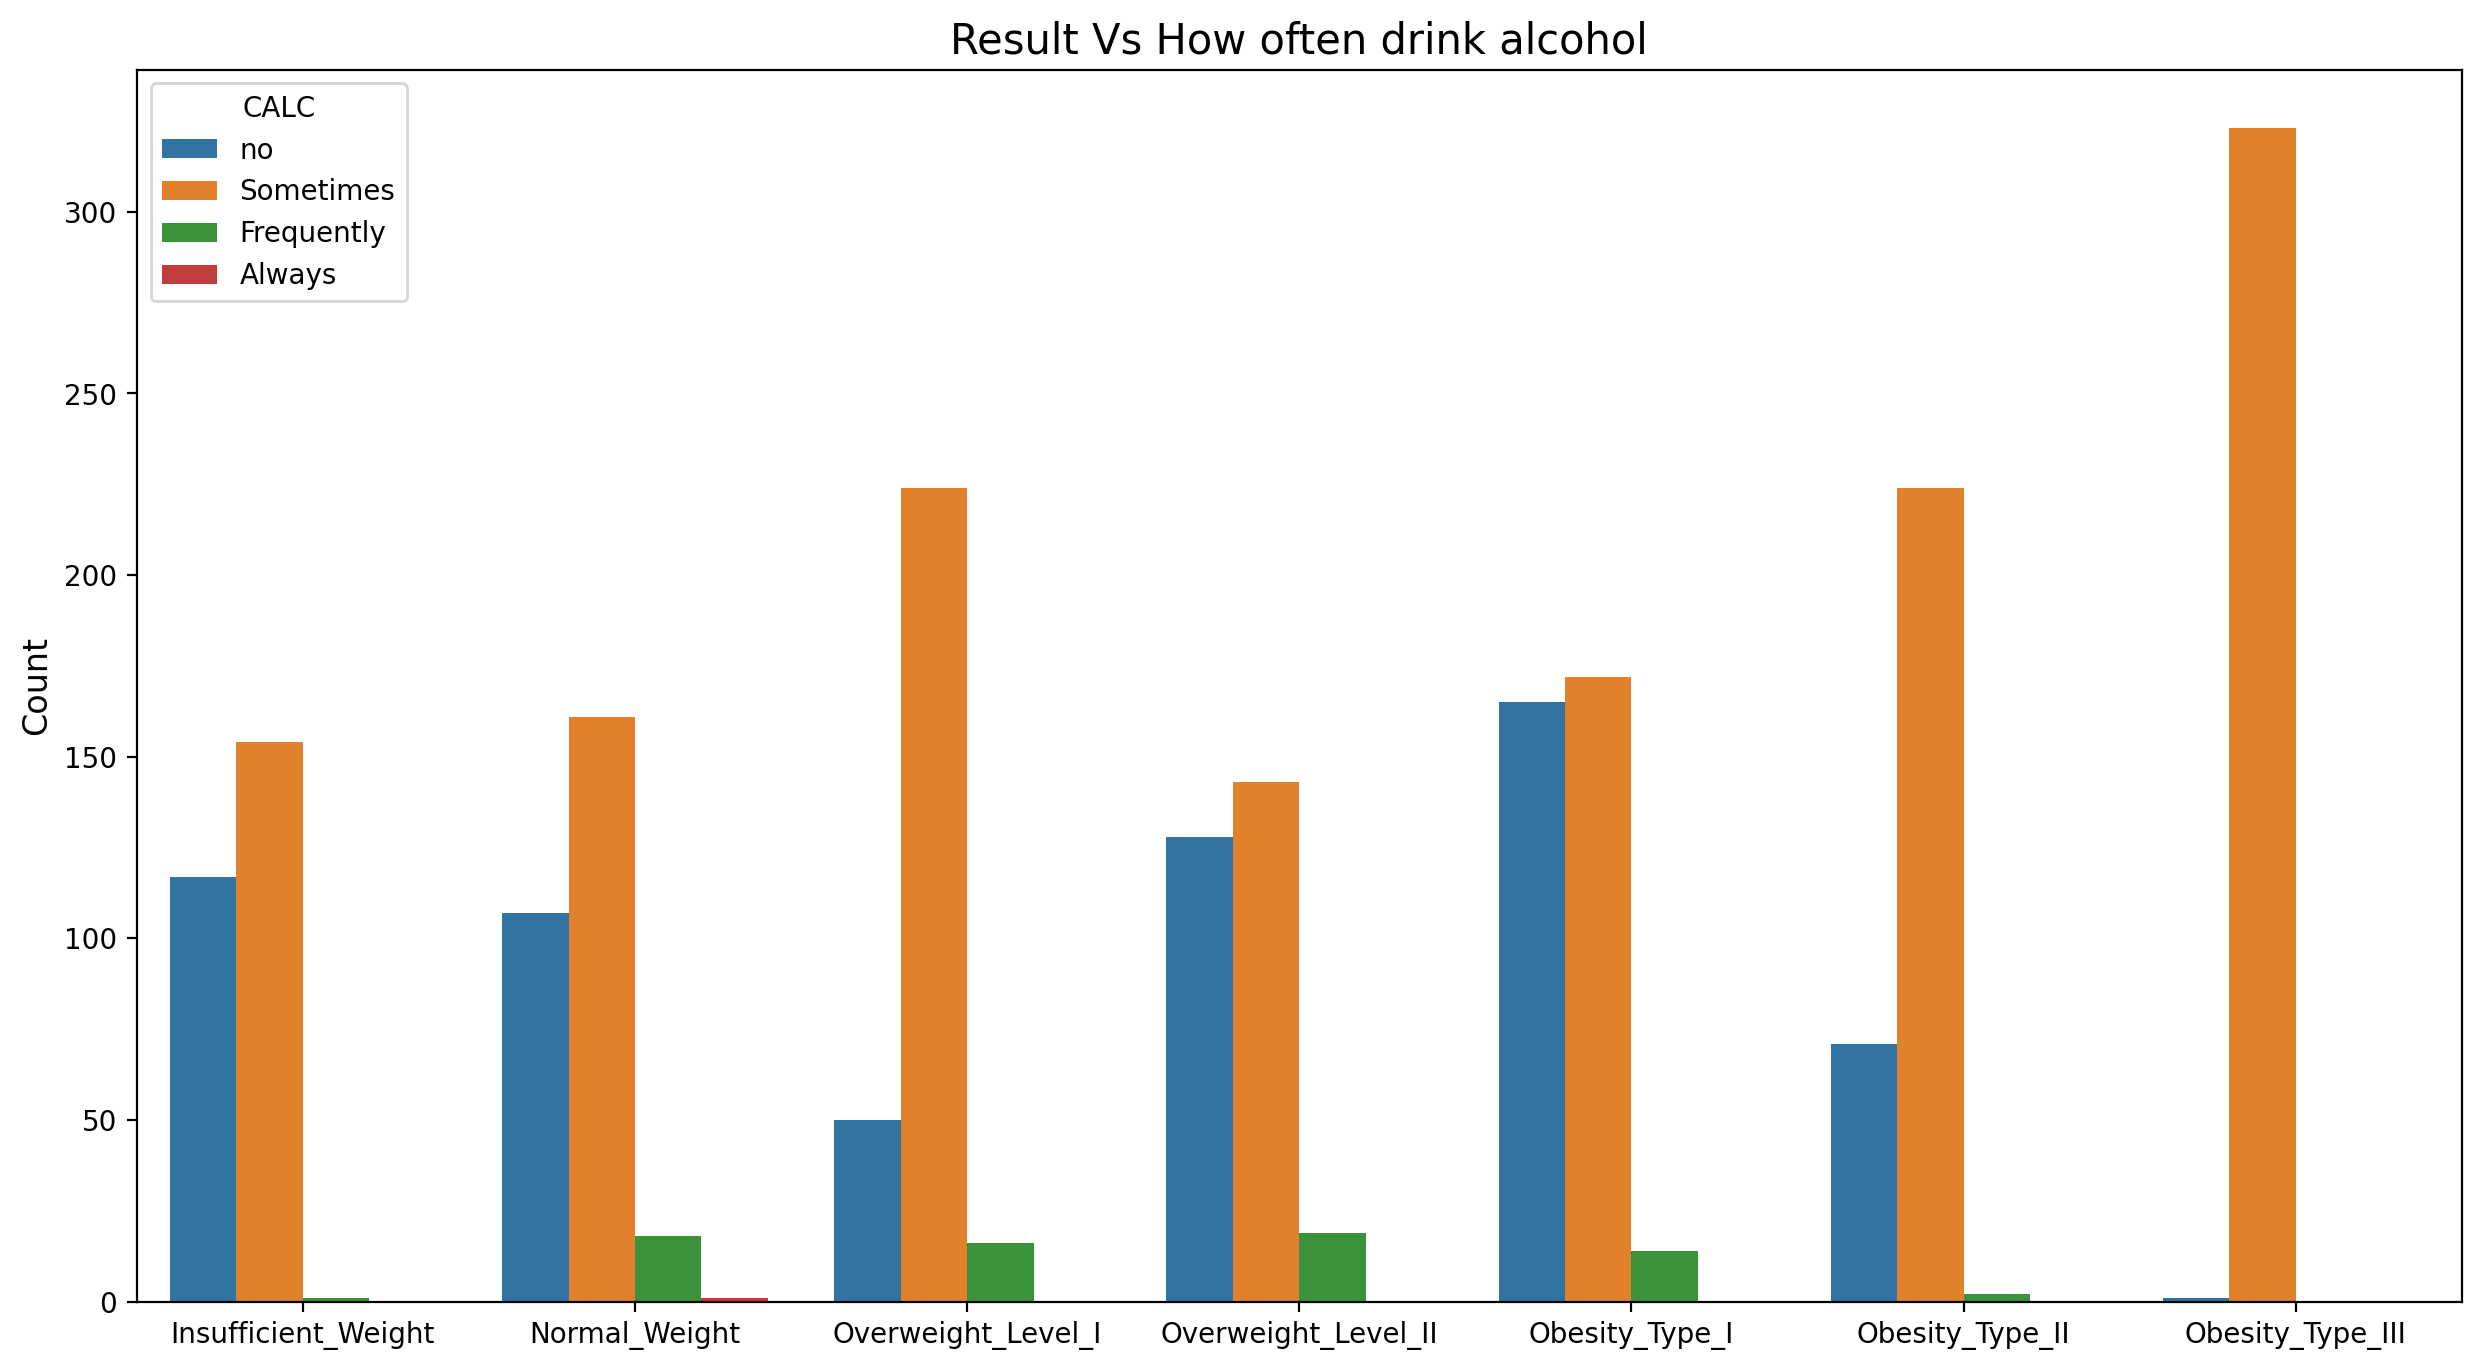

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(x='result',data=df,hue='CALC',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs How often drink alcohol',fontsize=15)
plt.show()

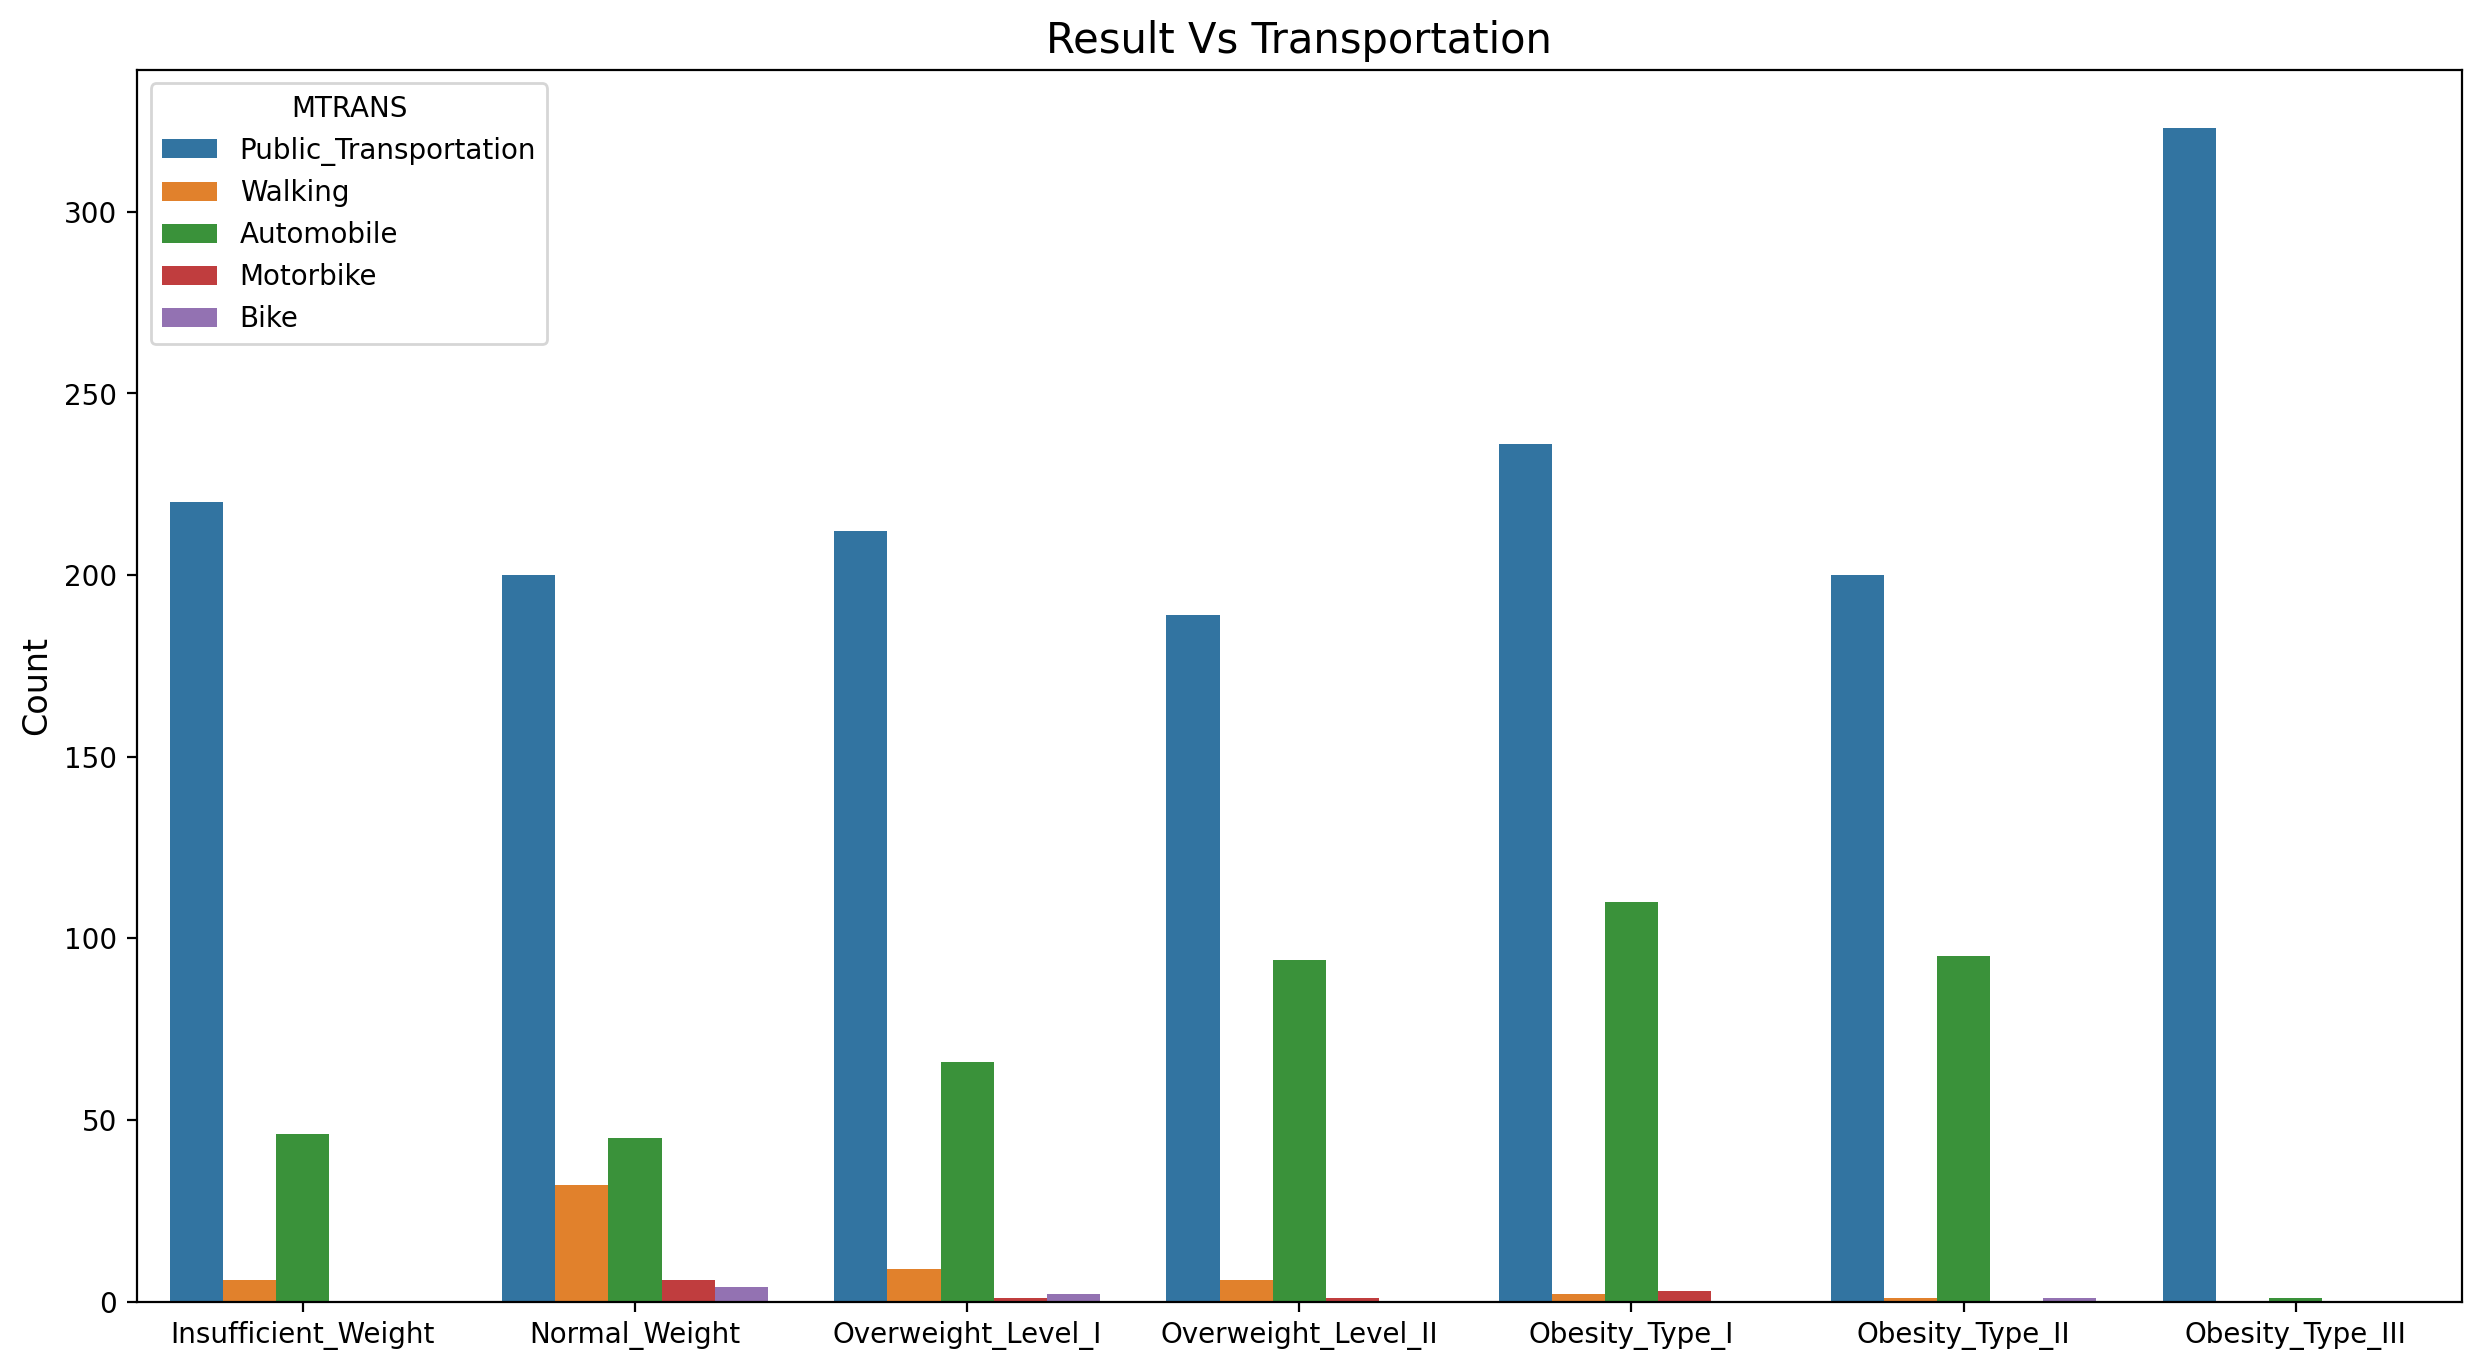

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(x='result',data=df,hue='MTRANS',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs Transportation',fontsize=15)
plt.show()

C:\Users\admin-1\AppData\Local\Temp\ipykernel_8260\452078910.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,square=True,center=0,vmin=-1,vmax=1,


<AxesSubplot: >

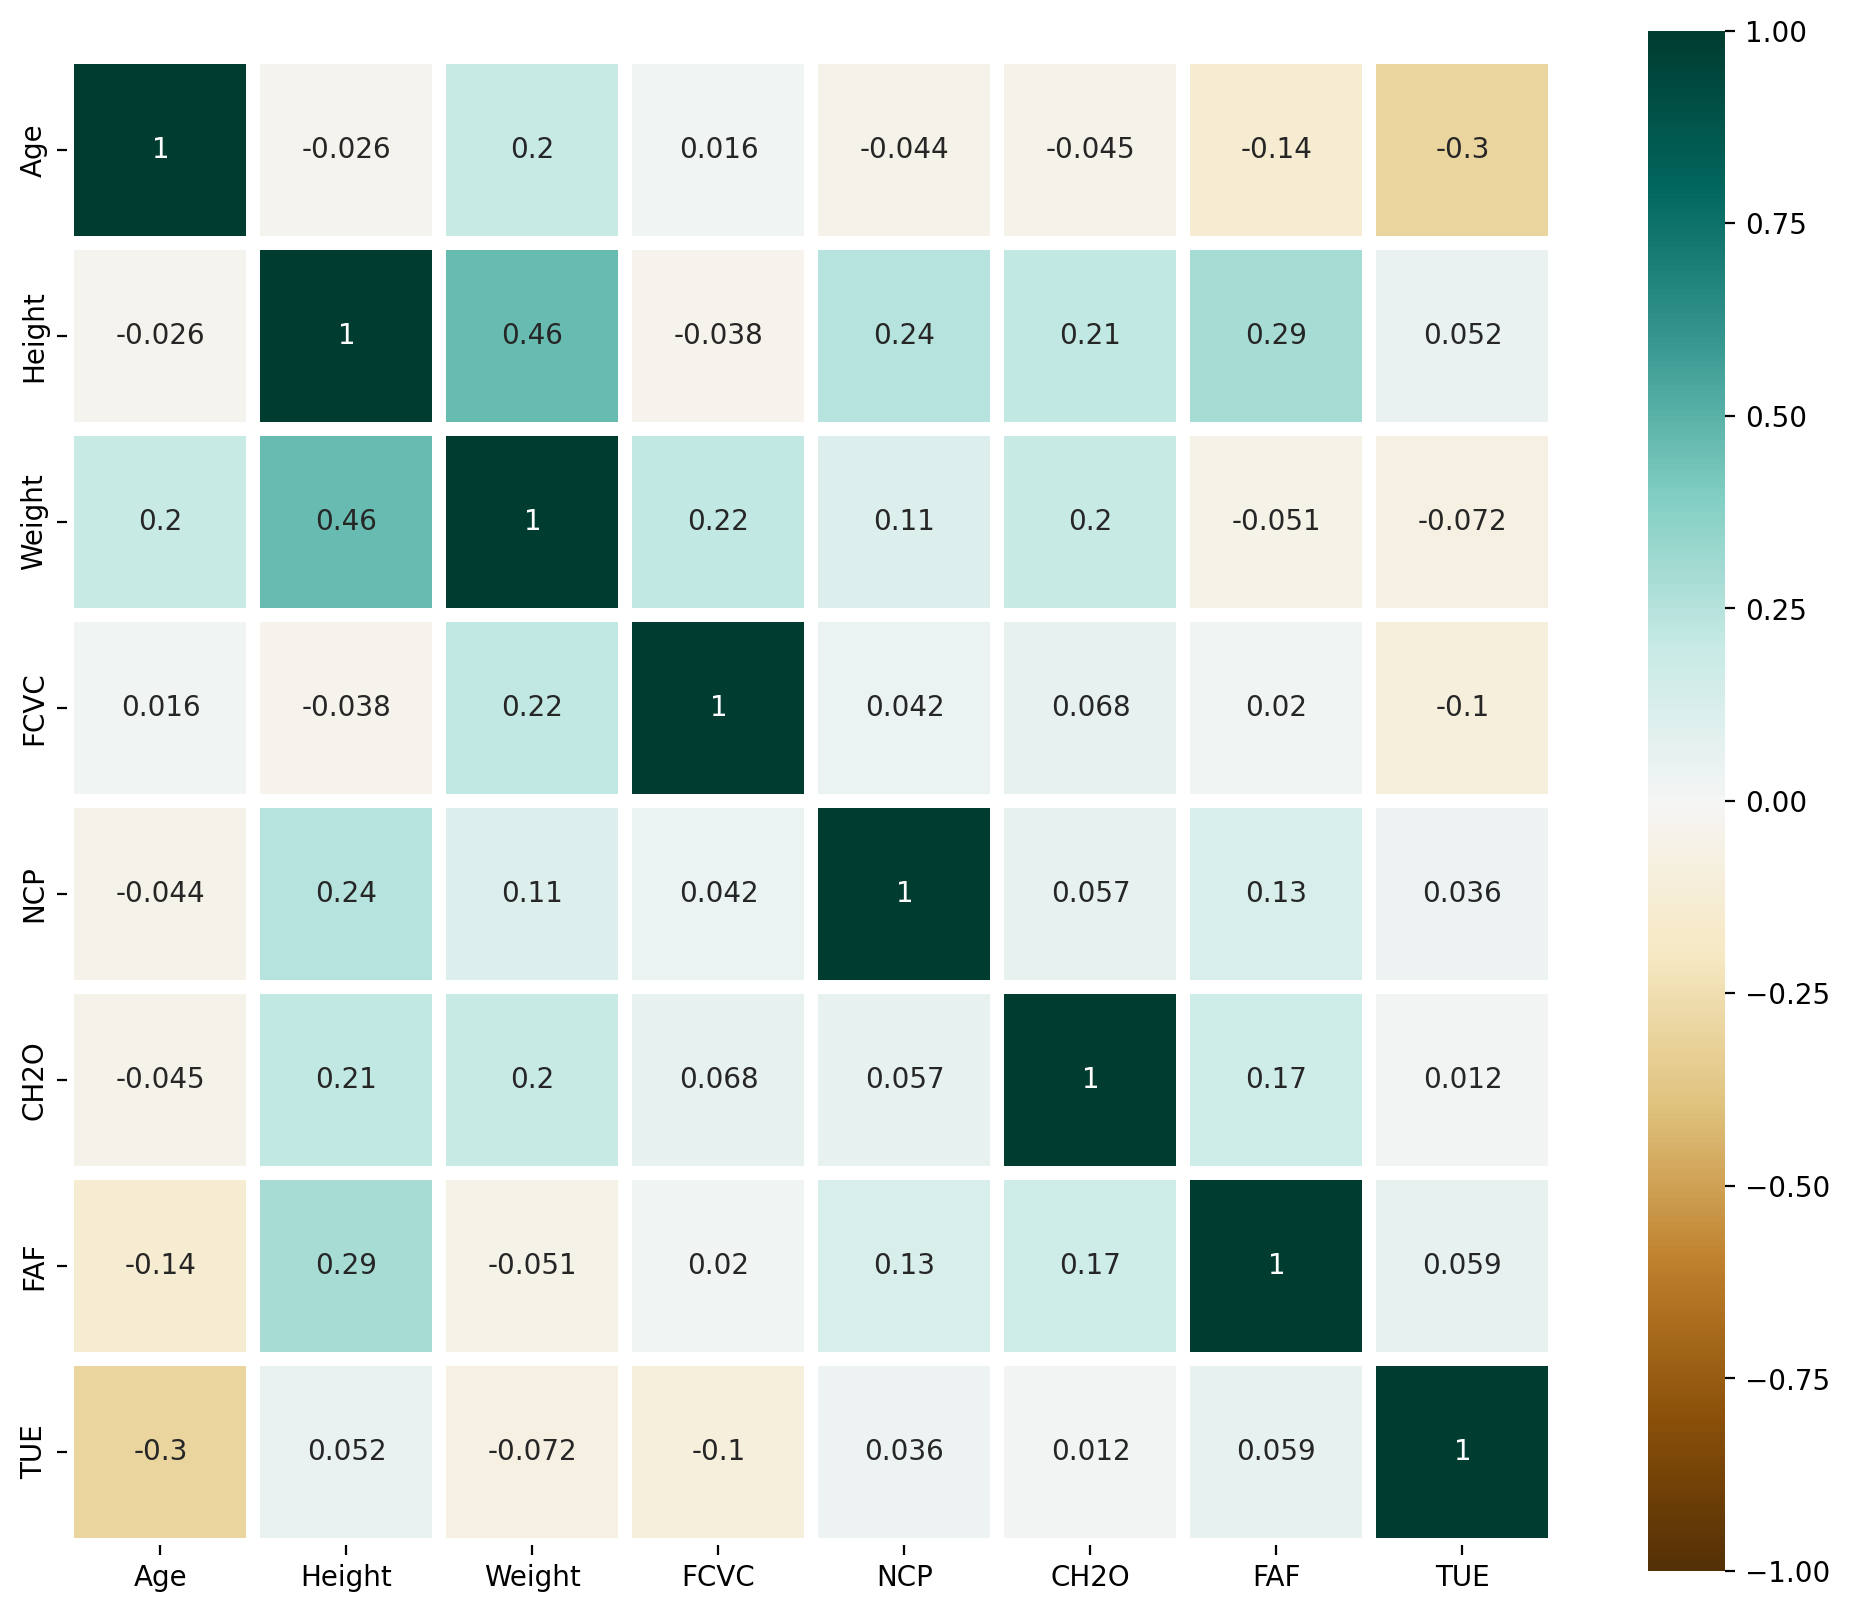

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,square=True,center=0,vmin=-1,vmax=1,
            cmap='BrBG',linewidths=5)

In [25]:
##data processing

In [26]:
data = df.copy()

feature = data.drop('result',axis=1)
answer = data['result'].values.reshape(-1)

In [27]:
le = LabelEncoder()
for column_name in feature.columns:
    if feature[column_name].dtype == object:
        feature[column_name] = le.fit_transform(feature[column_name])
    else:
        pass

answer = le.fit_transform(answer)

In [28]:
feature.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3


In [29]:
## modelling and tuning

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(feature,answer,test_size=0.3,random_state=42)

param_grid = {'criterion':['gini', 'entropy'],
              'splitter':['best','random'],
              'max_depth':list(range(1,50)),
              }

grid = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'splitter': 'best'}


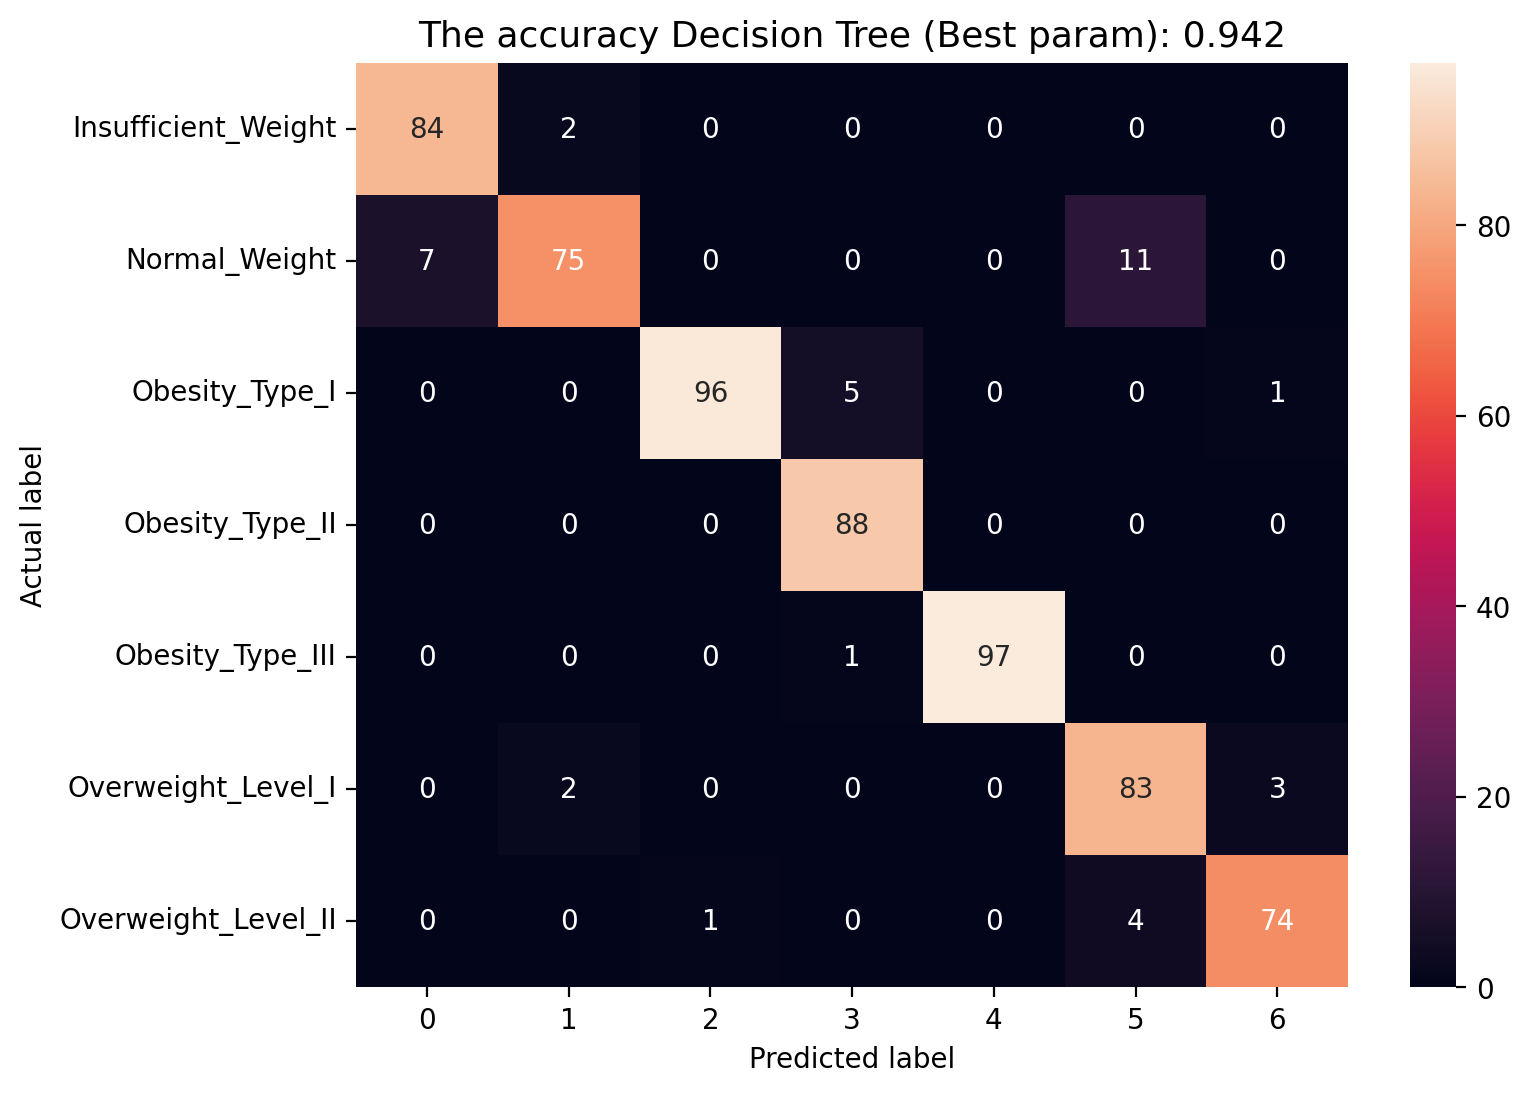

Accuracy score:  0.9416403785488959
Precision score:  0.9419945243325876
Recall:  0.9420084095495188
F1 score:  0.9404461036645301
ROC-AUC score 0.9695405027041227


In [31]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=9,splitter='best')
clf.fit(xtrain,ytrain)
y_pred = clf.predict(xtest)
y_prob = clf.predict_proba(xtest)

mapping = dict(zip(le.classes_, range(0, len(le.classes_)+1)))

cm = confusion_matrix(ytest,y_pred)
cm_df = pd.DataFrame(cm,index=mapping)

plt.figure(figsize=(8,6))                  
sns.heatmap(cm_df, annot=True)
plt.title('The accuracy Decision Tree (Best param): {0:.3f}'.format(accuracy_score(ytest,y_pred)),fontsize=13)
plt.ylabel('Actual label')
plt.xlabel('Predicted label',)
plt.show()

print('Accuracy score: ', accuracy_score(ytest,y_pred))
print('Precision score: ',precision_score(ytest,y_pred,average='macro'))
print('Recall: ', recall_score(ytest,y_pred,average='macro'))
print('F1 score: ',f1_score(ytest,y_pred,average='macro'))
print('ROC-AUC score',roc_auc_score(ytest, y_prob, multi_class="ovo",
                                  average="macro"))

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(feature,answer,test_size=0.3,random_state=42)

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

param_grid = {'hidden_layer_sizes': [(16,),(32,),(48,)],
    'activation': ['logistic', 'relu',  'tanh'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant','adaptive'],
    'learning_rate_init':[0.001,0.1,0.2]
}

grid = GridSearchCV(MLPClassifier(random_state=42),param_grid=param_grid,cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

C:\Users\admin-1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\admin-1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\admin-1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\admin-1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

{'activation': 'tanh', 'hidden_layer_sizes': (16,), 'learning_rate': 'constant', 'learning_rate_init': 0.2, 'solver': 'sgd'}


C:\Users\admin-1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


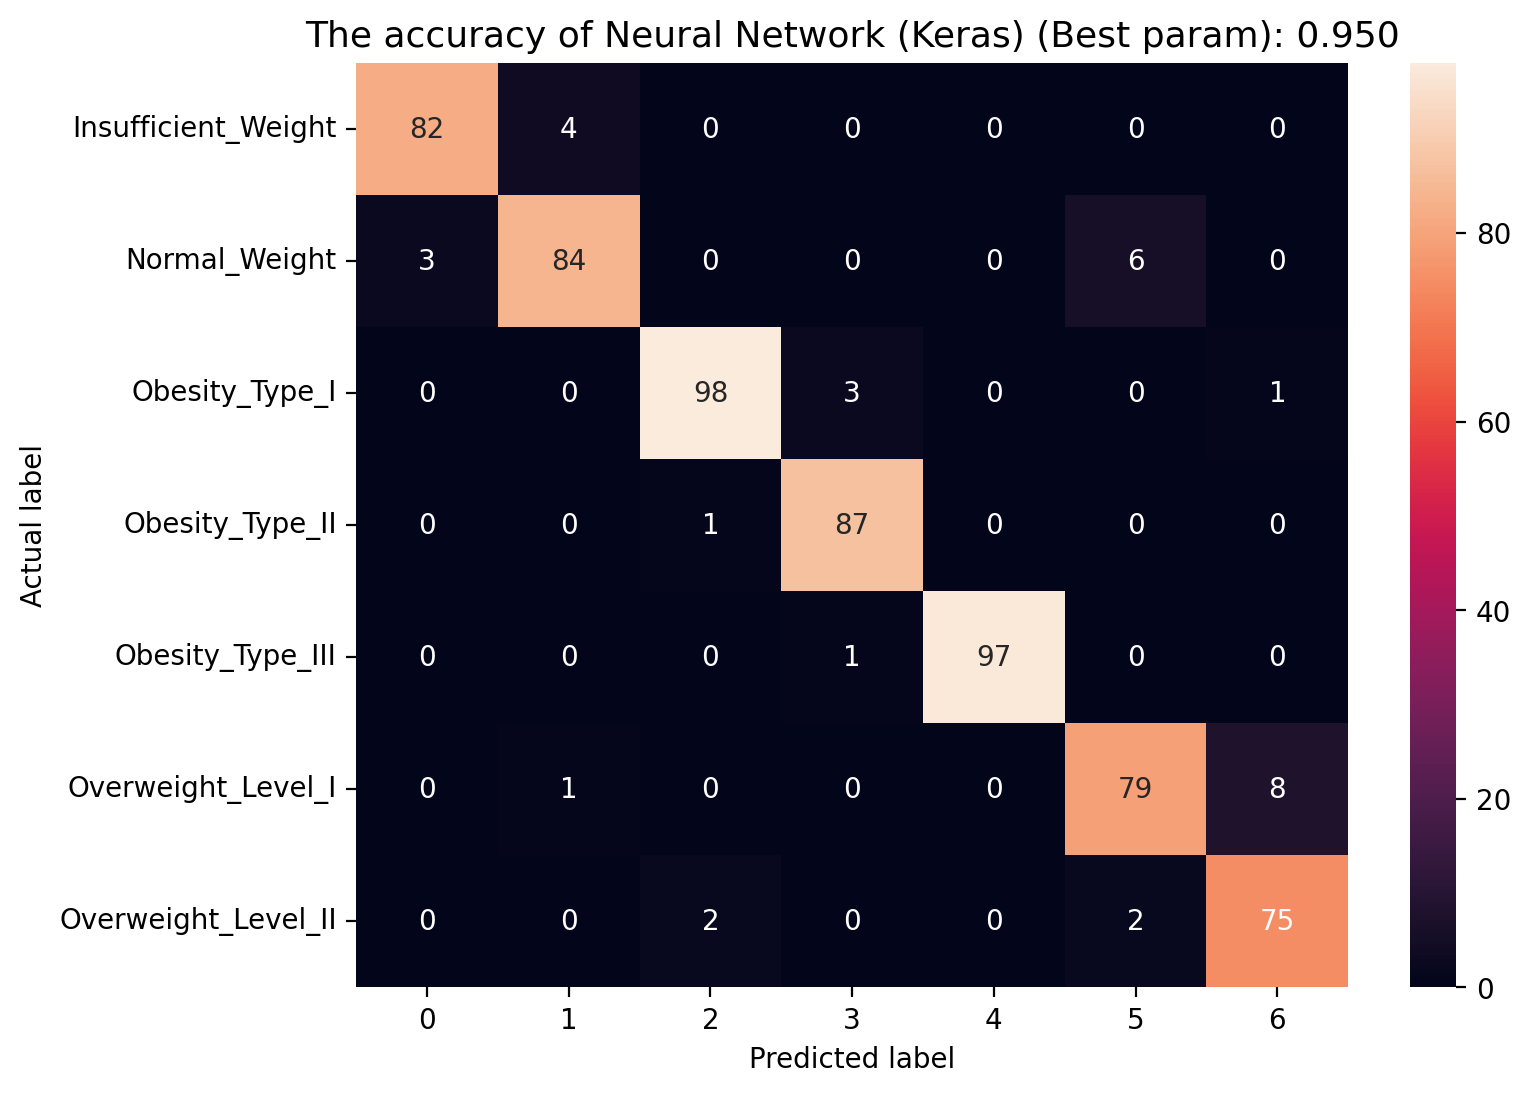

Accuracy score:  0.9495268138801262
Precision score:  0.9479671732410866
Recall:  0.9490035908012435
F1 score:  0.9482428382213861
ROC-AUC score 0.9975705078538368


In [34]:
cm = confusion_matrix(ytest,y_pred)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,index=mapping)

plt.figure(figsize=(8,6))                  
sns.heatmap(cm_df, annot=True)
plt.title('The accuracy of Neural Network (Keras) (Best param): {0:.3f}'.format(accuracy_score(ytest,y_pred)),fontsize=13)
plt.ylabel('Actual label')
plt.xlabel('Predicted label',)
plt.show()

print('Accuracy score: ', accuracy_score(ytest,y_pred))
print('Precision score: ',precision_score(ytest,y_pred,average='macro'))
print('Recall: ', recall_score(ytest,y_pred,average='macro'))
print('F1 score: ',f1_score(ytest,y_pred,average='macro'))
print('ROC-AUC score',roc_auc_score(ytest, y_prob, multi_class="ovo",
                                  average="macro"))

In [35]:
Accuracy = [0.9495268138801262,0.9290220820189274,0.9495268138801262,0.9542586750788643]
Precision = [0.9496370646467616,0.9289982846109511,0.9479671732410866,0.9527158255497573]
Recall =[0.949554506796094,0.9282477859822877,0.9490035908012435,0.9539127392113407]
F1Score = [0.9484366746957662,0.9282682517367851,0.9482428382213861,0.9529216047587254]
Roc = [0.974036944270467,0.994470045662756,0.9975705078538368,0.9976146480444302]

result = pd.DataFrame(index=['DecisionTree','RandomForest','MLP','Keras'])
result['Accuracy'] = Accuracy
result['Precision'] = Precision
result['Recall'] = Recall
result['F1-Score'] = F1Score
result['ROC-AUC score'] = Roc

print(result)

              Accuracy  Precision    Recall  F1-Score  ROC-AUC score
DecisionTree  0.949527   0.949637  0.949555  0.948437       0.974037
RandomForest  0.929022   0.928998  0.928248  0.928268       0.994470
MLP           0.949527   0.947967  0.949004  0.948243       0.997571
Keras         0.954259   0.952716  0.953913  0.952922       0.997615
